<a href="https://www.kaggle.com/code/dataranch/insider-trades-feature-importance-28-models?scriptVersionId=106682678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Insider Trades Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

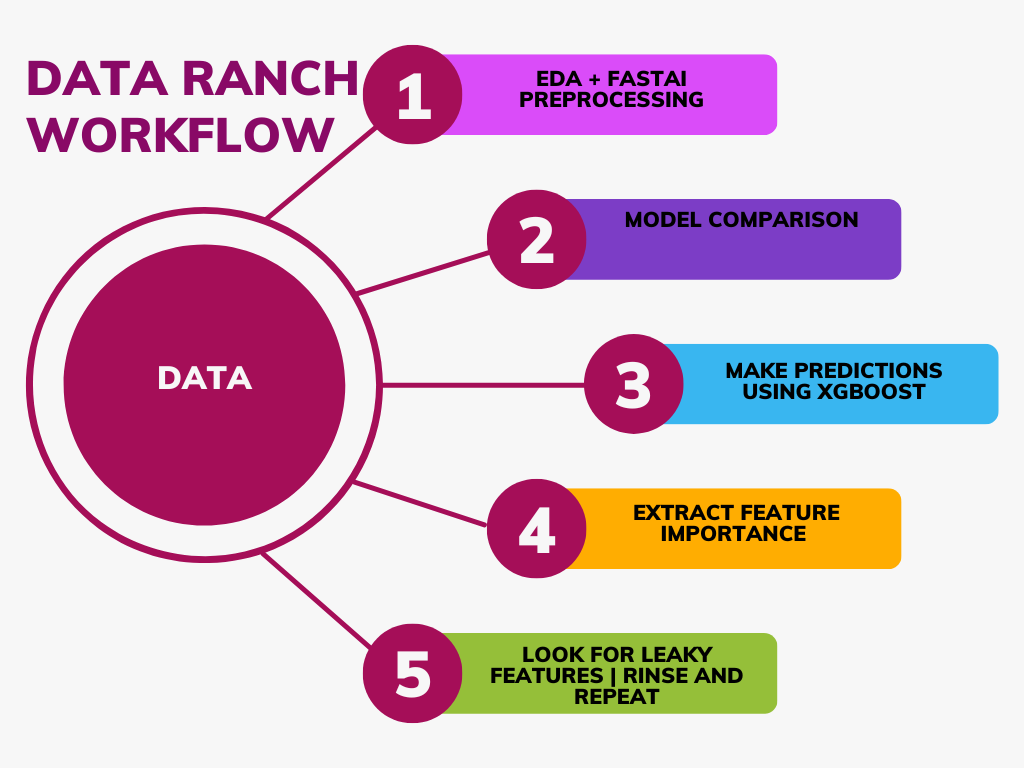

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 921.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 21.2 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is i

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'insider-trades-for-1000-companies'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/insider-trades-for-1000-companies
CSV!


In [9]:
df

,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
0,0 Relic Inc.,03/09/2020 17:31,01/09/2020,0R,Cirne Lewis,CEO 10%,S - Sale,62.74,-35500,6202967,-1%,-2227184,61.73,60.32,61.53,62.80
1,0 Relic Inc.,02/10/2020 17:52,01/10/2020,0R,Cirne Lewis,CEO 10%,S - Sale,57.48,-34500,6168467,-1%,-1982897,56.03,56.31,57.15,57.35
2,0 Relic Inc.,04/11/2020 17:03,02/11/2020,0R,Cirne Lewis,CEO 10%,S - Sale,58.92,-35500,6132976,-1%,-2091741,63.33,63.15,60.96,58.92
3,0 Relic Inc.,10/11/2020 19:13,10/11/2020,0R,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0,260009,55.45,53.73,55.45,53.73
4,0 Relic Inc.,17/11/2020 18:13,16/11/2020,0R,Sachleben Mark,CFO,S - Sale+OE,56.00,-2351,371740,-1%,-131661,55.15,56.45,56.03,54.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Juniper Networks Inc,17/12/2021 18:34,15/12/2021,JNPR,Rahim Rami,CEO,S - Sale,33.64,-16665,736063,-2%,-560667,33.29,33.64,33.73,34.05
19996,Juniper Networks Inc,02/02/2022 17:05,01/02/2022,JNPR,Miller Kenneth Bradley,EVP CFO,S - Sale,34.78,-6000,121804,-5%,-208680,34.16,34.60,34.78,34.04
19997,Juniper Networks Inc,04/02/2022 18:02,04/02/2022,JNPR,Stensrud William,Dir,S - Sale,35.39,-10000,91969,-10%,-353920,34.77,35.13,34.77,35.13
19998,Juniper Networks Inc,11/02/2022 18:22,09/02/2022,JNPR,Rahim Rami,CEO,S - Sale,34.77,-16665,719398,-2%,-579449,34.51,33.99,35.08,35.13


In [10]:
df.isna().sum()

Company                   0
Filing Date               0
Trade Date                0
Ticker                    0
Insider Name              0
Title                     0
Transaction Type          0
Price                     0
Quantity                  0
Owned                     0
Change of Amount Owned    0
Value                     0
Date Filed Open           0
Date Filed Close          0
Date Traded Open          0
Date Traded Close         0
dtype: int64

<AxesSubplot:>

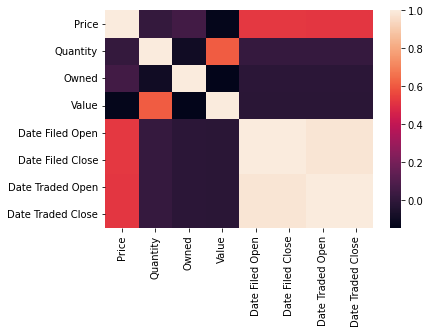

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
0,0 Relic Inc.,03/09/2020 17:31,01/09/2020,0R,Cirne Lewis,CEO 10%,S - Sale,62.74,-35500,6202967,-1%,-2227184,61.73,60.32,61.53,62.80
1,0 Relic Inc.,02/10/2020 17:52,01/10/2020,0R,Cirne Lewis,CEO 10%,S - Sale,57.48,-34500,6168467,-1%,-1982897,56.03,56.31,57.15,57.35
2,0 Relic Inc.,04/11/2020 17:03,02/11/2020,0R,Cirne Lewis,CEO 10%,S - Sale,58.92,-35500,6132976,-1%,-2091741,63.33,63.15,60.96,58.92
3,0 Relic Inc.,10/11/2020 19:13,10/11/2020,0R,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0,260009,55.45,53.73,55.45,53.73
4,0 Relic Inc.,17/11/2020 18:13,16/11/2020,0R,Sachleben Mark,CFO,S - Sale+OE,56.00,-2351,371740,-1%,-131661,55.15,56.45,56.03,54.79


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Price,20000.00,167.91,382.83,0.00,34.49,80.00,146.01,3717.29
Quantity,20000.00,-71124.58,1475270.64,-72025826.00,-17500.00,-5000.00,-1000.00,63424125.00
Owned,20000.00,2407615.01,16526339.46,0.00,16279.00,57464.00,260311.75,702446491.00
Value,20000.00,-4225856.70,40612004.02,-1522150000.00,-1563894.25,-398125.00,-75000.00,1867046402.00
Date Filed Open,20000.00,122.03,199.42,0.00,29.06,76.37,138.75,2664.81
Date Filed Close,20000.00,122.01,199.67,0.00,28.89,76.35,138.27,2623.95
Date Traded Open,20000.00,126.44,198.57,0.00,33.97,79.57,141.42,2573.48
Date Traded Close,20000.00,126.74,199.24,0.00,34.03,79.96,141.19,2635.16


In [14]:
df.columns

Index(['Company', 'Filing Date', 'Trade Date', 'Ticker', 'Insider Name',
       'Title', 'Transaction Type', 'Price', 'Quantity', 'Owned',
       'Change of Amount Owned', 'Value', 'Date Filed Open',
       'Date Filed Close', 'Date Traded Open', 'Date Traded Close'],
      dtype='object')

Target Variable: Date Traded Close
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabular Object siz

  2%|▏         | 1/42 [00:00<00:11,  3.50it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.08019169966603257, 'Adjusted R-Squared': 0.07868505216343813, 'RMSE': 216.43856072877344, 'Time taken': 0.28540587425231934}


 10%|▉         | 4/42 [00:01<00:09,  4.03it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9485406856656678, 'Adjusted R-Squared': 0.9484563952244978, 'RMSE': 51.19387135077817, 'Time taken': 0.6489894390106201}
{'Model': 'BayesianRidge', 'R-Squared': 0.018005876790650244, 'Adjusted R-Squared': 0.01639736880832543, 'RMSE': 223.6353325018534, 'Time taken': 0.04800772666931152}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9151146061442237, 'Adjusted R-Squared': 0.9149755637300455, 'RMSE': 65.75101465830856, 'Time taken': 0.14758944511413574}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005357517286883606, 'Adjusted R-Squared': -0.002174630928899024, 'RMSE': 225.73674, 'Time taken': 0.01789236068725586}
{'Model': 'ElasticNet', 'R-Squared': 0.014929498253381301, 'Adjusted R-Squared': 0.01331595115797335, 'RMSE': 223.98535952037233, 'Time taken': 0.027293920516967773}


 19%|█▉        | 8/42 [00:01<00:05,  5.89it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.01792594167166295, 'Adjusted R-Squared': 0.016317302755482266, 'RMSE': 223.64443436545878, 'Time taken': 0.33582448959350586}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7185276500547372, 'Adjusted R-Squared': 0.7180665978844747, 'RMSE': 119.73023767532595, 'Time taken': 0.13448166847229004}


 21%|██▏       | 9/42 [00:04<00:22,  1.45it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8561197718507909, 'Adjusted R-Squared': 0.8558840958014065, 'RMSE': 85.60251689543854, 'Time taken': 2.387864589691162}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:16<07:45, 15.01s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -8301.993286466834, 'Adjusted R-Squared': -8315.593603070382, 'RMSE': 20563.797499144348, 'Time taken': 72.74662518501282}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.013162739790323008, 'Adjusted R-Squared': 0.011546298741658578, 'RMSE': 224.18613233295426, 'Time taken': 0.03300118446350098}


 31%|███       | 13/42 [01:18<04:44,  9.80s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.789750605818093, 'Adjusted R-Squared': 0.7894062169660342, 'RMSE': 103.47926889969283, 'Time taken': 1.3742377758026123}


 33%|███▎      | 14/42 [01:18<03:40,  7.89s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8921220118696507, 'Adjusted R-Squared': 0.8919453075483889, 'RMSE': 74.12289863050668, 'Time taken': 0.5605716705322266}
{'Model': 'HuberRegressor', 'R-Squared': -0.027947092489070124, 'Adjusted R-Squared': -0.029630871510346157, 'RMSE': 228.80807976976308, 'Time taken': 0.08631396293640137}


 38%|███▊      | 16/42 [01:18<02:10,  5.00s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.05602196041422325, 'Adjusted R-Squared': 0.05447572283914426, 'RMSE': 219.2638, 'Time taken': 0.12688469886779785}


 45%|████▌     | 19/42 [01:52<02:38,  6.90s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.32136393169449606, 'Adjusted R-Squared': -0.32352832797900777, 'RMSE': 259.4162631798895, 'Time taken': 33.62262678146362}
{'Model': 'Lars', 'R-Squared': 0.019185619867443937, 'Adjusted R-Squared': 0.017579044306211378, 'RMSE': 223.50095719501718, 'Time taken': 0.023920297622680664}
{'Model': 'LarsCV', 'R-Squared': 0.019185619867443937, 'Adjusted R-Squared': 0.017579044306211378, 'RMSE': 223.50095719501718, 'Time taken': 0.08524298667907715}
{'Model': 'Lasso', 'R-Squared': 0.01749368083168079, 'Adjusted R-Squared': 0.015884333871536205, 'RMSE': 223.69364760703053, 'Time taken': 0.03312969207763672}


 57%|█████▋    | 24/42 [01:53<00:47,  2.62s/it]

{'Model': 'LassoCV', 'R-Squared': 0.018096614732311722, 'Adjusted R-Squared': 0.016488255378883987, 'RMSE': 223.62500011897313, 'Time taken': 0.24437761306762695}
{'Model': 'LassoLars', 'R-Squared': -0.0005357511725394559, 'Adjusted R-Squared': -0.0021746303718390703, 'RMSE': 225.73675664947774, 'Time taken': 0.024560213088989258}
{'Model': 'LassoLarsCV', 'R-Squared': 0.019185619867443937, 'Adjusted R-Squared': 0.017579044306211378, 'RMSE': 223.50095719501718, 'Time taken': 0.05592536926269531}
{'Model': 'LassoLarsIC', 'R-Squared': 0.019185619867443937, 'Adjusted R-Squared': 0.017579044306211378, 'RMSE': 223.50095719501718, 'Time taken': 0.024350881576538086}
{'Model': 'LinearRegression', 'R-Squared': 0.01918561986739442, 'Adjusted R-Squared': 0.01757904430616175, 'RMSE': 223.50095719502283, 'Time taken': 0.022279977798461914}
{'Model': 'LinearSVR', 'R-Squared': -0.03641105162927305, 'Adjusted R-Squared': -0.03810869462948463, 'RMSE': 229.74813403782846, 'Time taken': 0.059359312057495

 64%|██████▍   | 27/42 [02:14<01:04,  4.29s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.03538173750396312, 'Adjusted R-Squared': 0.03380169120994836, 'RMSE': 221.64794804800914, 'Time taken': 20.99815821647644}


 74%|███████▍  | 31/42 [02:26<00:36,  3.31s/it]

{'Model': 'NuSVR', 'R-Squared': -0.018845884205535013, 'Adjusted R-Squared': -0.020514755432734733, 'RMSE': 227.7929205925755, 'Time taken': 11.839073419570923}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.013888105627278158, 'Adjusted R-Squared': 0.012272852729042882, 'RMSE': 224.10372418847487, 'Time taken': 0.02512645721435547}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.01815427922050583, 'Adjusted R-Squared': 0.016546014321604186, 'RMSE': 223.6184335816215, 'Time taken': 0.06011772155761719}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.05052692012961901, 'Adjusted R-Squared': -0.05224768494555598, 'RMSE': 231.30742188608878, 'Time taken': 0.05700945854187012}


 79%|███████▊  | 33/42 [02:26<00:21,  2.44s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.01586687540869436, 'Adjusted R-Squared': 0.014254863738602186, 'RMSE': 223.87876373312383, 'Time taken': 0.0688486099243164}
{'Model': 'RANSACRegressor', 'R-Squared': -0.06642214966509896, 'Adjusted R-Squared': -0.06816895089305142, 'RMSE': 233.0507761040449, 'Time taken': 0.19089651107788086}


 88%|████████▊ | 37/42 [02:30<00:08,  1.68s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9510893805469536, 'Adjusted R-Squared': 0.9510092648721739, 'RMSE': 49.90999849150661, 'Time taken': 4.148961305618286}
{'Model': 'Ridge', 'R-Squared': 0.018250661118426437, 'Adjusted R-Squared': 0.016642554093231454, 'RMSE': 223.60745767291462, 'Time taken': 0.015799522399902344}
{'Model': 'RidgeCV', 'R-Squared': 0.01877317946986201, 'Adjusted R-Squared': 0.017165928330582614, 'RMSE': 223.5479442380569, 'Time taken': 0.030683517456054688}
{'Model': 'SGDRegressor', 'R-Squared': 0.018480476002001645, 'Adjusted R-Squared': 0.016872745413962442, 'RMSE': 223.58128432728324, 'Time taken': 0.07809782028198242}


 90%|█████████ | 38/42 [02:41<00:13,  3.31s/it]

{'Model': 'SVR', 'R-Squared': -0.03353122878528714, 'Adjusted R-Squared': -0.03522415463096329, 'RMSE': 229.42871725066342, 'Time taken': 11.252004146575928}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.01918561986739442, 'Adjusted R-Squared': 0.01757904430616175, 'RMSE': 223.50095719502283, 'Time taken': 0.022431373596191406}
{'Model': 'TweedieRegressor', 'R-Squared': 0.013162739790323008, 'Adjusted R-Squared': 0.011546298741658578, 'RMSE': 224.18613233295426, 'Time taken': 0.05753493309020996}


 98%|█████████▊| 41/42 [02:42<00:02,  2.05s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9544200849033132, 'Adjusted R-Squared': 0.9543454249277249, 'RMSE': 48.18066, 'Time taken': 0.853449821472168}


100%|██████████| 42/42 [02:43<00:00,  3.88s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8716297238854316, 'Adjusted R-Squared': 0.8714194531628852, 'RMSE': 80.85710964945689, 'Time taken': 0.23016643524169922}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Date Traded Close
Date Traded Close
Target Standard Deviation: 199.7099151611328
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
XGBRegressor                                 0.95       0.95    48.18   
RandomForestRegressor                        0.95       0.95    49.91   
BaggingRegressor                             0.95       0.95    51.19   
DecisionTreeRegressor                        0.91       0.92    65.75   
HistGradientBoostingRegressor                0.89       0.89    74.12   
LGBMRegressor                                0.87       0.87    80.86   
ExtraTreesRegressor                          0.86       0.86    85.60   
GradientBoost

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,36091.046875,51004.980469,225.842819,00:08
1,31788.326172,38916.585938,197.272858,00:09
2,20203.582031,30372.191406,174.276169,00:09
3,17384.535156,70247.992188,265.043365,00:09


Better model found at epoch 0 with _rmse value: 225.8428192138672.
Better model found at epoch 1 with _rmse value: 197.27285766601562.
Better model found at epoch 2 with _rmse value: 174.2761688232422.
No improvement since epoch 2: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Date Traded Close,Date Traded Close_pred
0,415.00,254.00,374.00,2.00,40.00,40.00,148.55,240.81
1,615.00,185.00,625.00,2.00,108.00,107.00,32.75,66.38
2,290.00,501.00,244.00,2.00,52.00,52.00,210.89,112.60
3,225.00,50.00,582.00,1.00,107.00,107.00,0.00,66.69
4,107.00,284.00,98.00,3.00,8.00,8.00,313.22,98.54
5,238.00,343.00,216.00,2.00,8.00,8.00,68.27,113.49
6,189.00,378.00,179.00,3.00,39.00,39.00,9.85,96.15
7,437.00,26.00,404.00,3.00,108.00,107.00,709.46,1266.15
8,568.00,513.00,539.00,3.00,24.00,24.00,15.92,104.35


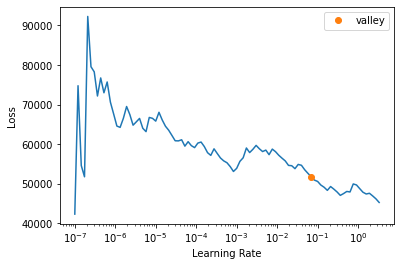

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  334.34     376.88
1  126.46      79.21
2   34.77      18.80
3  158.35     126.56
4    5.60      63.71
XGBoost RMSE:  48.14727


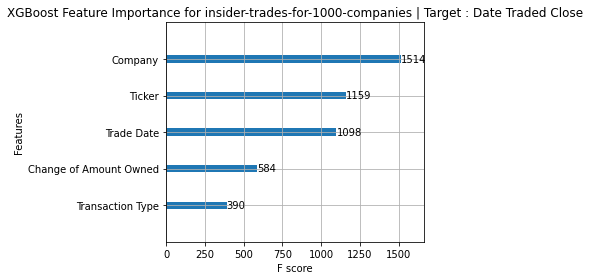

Target Variable: Date Traded Open
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabular Object si

  2%|▏         | 1/42 [00:00<00:09,  4.45it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.22564679762151307, 'Adjusted R-Squared': -0.22765440908362855, 'RMSE': 224.47857833621566, 'Time taken': 0.22440886497497559}


 10%|▉         | 4/42 [00:00<00:06,  5.50it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9516042888328758, 'Adjusted R-Squared': 0.9515250165787118, 'RMSE': 44.60624586858303, 'Time taken': 0.4158480167388916}
{'Model': 'BayesianRidge', 'R-Squared': 0.014833937023422394, 'Adjusted R-Squared': 0.013220233398563264, 'RMSE': 201.2551290129181, 'Time taken': 0.032326698303222656}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9183686782246957, 'Adjusted R-Squared': 0.9182349659859155, 'RMSE': 57.93228387957397, 'Time taken': 0.14502811431884766}
{'Model': 'DummyRegressor', 'R-Squared': -5.010169346952864e-06, 'Adjusted R-Squared': -0.0016430200140140627, 'RMSE': 202.76517, 'Time taken': 0.011957645416259766}
{'Model': 'ElasticNet', 'R-Squared': 0.013881271415710716, 'Adjusted R-Squared': 0.01226600732302563, 'RMSE': 201.35241337869783, 'Time taken': 0.017948150634765625}


 17%|█▋        | 7/42 [00:01<00:04,  7.55it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.014863937824606599, 'Adjusted R-Squared': 0.013250283341108893, 'RMSE': 201.25206462544725, 'Time taken': 0.25565242767333984}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.69540043960085, 'Adjusted R-Squared': 0.6949015050219816, 'RMSE': 111.90690171837883, 'Time taken': 0.08627700805664062}


 21%|██▏       | 9/42 [00:03<00:16,  2.05it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8832581445040988, 'Adjusted R-Squared': 0.8830669211535731, 'RMSE': 69.27962554570138, 'Time taken': 2.1887245178222656}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:15<06:23, 12.38s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -516611.62144772866, 'Adjusted R-Squared': -517457.8337678723, 'RMSE': 145738.64989481814, 'Time taken': 71.89205026626587}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.012759600695717355, 'Adjusted R-Squared': 0.011142499304555686, 'RMSE': 201.46689600248646, 'Time taken': 0.07800745964050293}


 31%|███       | 13/42 [01:16<04:08,  8.58s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.779452952223147, 'Adjusted R-Squared': 0.7790916957976322, 'RMSE': 95.22321934193198, 'Time taken': 1.1778717041015625}


 36%|███▌      | 15/42 [01:17<02:32,  5.64s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8843692070836406, 'Adjusted R-Squared': 0.8841798036554402, 'RMSE': 68.94916128645914, 'Time taken': 0.7702889442443848}
{'Model': 'HuberRegressor', 'R-Squared': -0.030931371281013975, 'Adjusted R-Squared': -0.0326200385558395, 'RMSE': 205.87665980143564, 'Time taken': 0.15398597717285156}


 38%|███▊      | 16/42 [01:17<01:53,  4.36s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.19251234851230203, 'Adjusted R-Squared': 0.19118968241649914, 'RMSE': 182.20496, 'Time taken': 0.10654354095458984}


 45%|████▌     | 19/42 [01:51<02:36,  6.82s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.38225197212539763, 'Adjusted R-Squared': -0.38451610311986983, 'RMSE': 238.38879859491456, 'Time taken': 33.5619900226593}
{'Model': 'Lars', 'R-Squared': 0.015451978438812963, 'Adjusted R-Squared': 0.013839287166804604, 'RMSE': 201.19199066315988, 'Time taken': 0.034363746643066406}
{'Model': 'LarsCV', 'R-Squared': 0.015451978438812963, 'Adjusted R-Squared': 0.013839287166804604, 'RMSE': 201.19199066315988, 'Time taken': 0.07603931427001953}
{'Model': 'Lasso', 'R-Squared': 0.014388339287147778, 'Adjusted R-Squared': 0.012773905772466732, 'RMSE': 201.30063844273326, 'Time taken': 0.03413891792297363}


 55%|█████▍    | 23/42 [01:51<00:54,  2.86s/it]

{'Model': 'LassoCV', 'R-Squared': 0.014724172793305956, 'Adjusted R-Squared': 0.013110289374458017, 'RMSE': 201.26634032024998, 'Time taken': 0.2780117988586426}
{'Model': 'LassoLars', 'R-Squared': -5.002489927852238e-06, 'Adjusted R-Squared': -0.0016430123220161352, 'RMSE': 202.76515411720018, 'Time taken': 0.03879046440124512}
{'Model': 'LassoLarsCV', 'R-Squared': 0.015451978438812963, 'Adjusted R-Squared': 0.013839287166804604, 'RMSE': 201.19199066315988, 'Time taken': 0.10509490966796875}
{'Model': 'LassoLarsIC', 'R-Squared': 0.015451978438812963, 'Adjusted R-Squared': 0.013839287166804604, 'RMSE': 201.19199066315988, 'Time taken': 0.026337623596191406}
{'Model': 'LinearRegression', 'R-Squared': 0.015451978438770553, 'Adjusted R-Squared': 0.013839287166762082, 'RMSE': 201.1919906631642, 'Time taken': 0.022441387176513672}


 62%|██████▏   | 26/42 [01:51<00:26,  1.65s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.04115638109775821, 'Adjusted R-Squared': -0.042861796955412146, 'RMSE': 206.89510630534963, 'Time taken': 0.059861183166503906}


 64%|██████▍   | 27/42 [02:13<01:14,  4.97s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.03352610158391511, 'Adjusted R-Squared': 0.03194301575522385, 'RMSE': 199.3367166578935, 'Time taken': 21.2882661819458}


 74%|███████▍  | 31/42 [02:24<00:37,  3.42s/it]

{'Model': 'NuSVR', 'R-Squared': -0.019944130906323077, 'Adjusted R-Squared': -0.02161480106341762, 'RMSE': 204.7766469138515, 'Time taken': 11.462082624435425}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.011329682012390152, 'Adjusted R-Squared': 0.009710238412082961, 'RMSE': 201.61274550385235, 'Time taken': 0.02686166763305664}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.014743242939800894, 'Adjusted R-Squared': 0.013129390757884218, 'RMSE': 201.26439254224675, 'Time taken': 0.06269478797912598}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.04842178133754538, 'Adjusted R-Squared': -0.05013909793269278, 'RMSE': 207.61572931930198, 'Time taken': 0.04316091537475586}
{'Model': 'PoissonRegressor', 'R-Squared': 0.011800036117071144, 'Adjusted R-Squared': 0.010181362957557893, 'RMSE': 201.56478175800478, 'Time taken': 0.05761122703552246}


 79%|███████▊  | 33/42 [02:25<00:21,  2.43s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.027198512784291973, 'Adjusted R-Squared': -0.028881065630785407, 'RMSE': 205.5035964783164, 'Time taken': 0.1977236270904541}


 88%|████████▊ | 37/42 [02:29<00:08,  1.67s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9510239654496142, 'Adjusted R-Squared': 0.9509437426247979, 'RMSE': 44.872890447333155, 'Time taken': 4.328397274017334}
{'Model': 'Ridge', 'R-Squared': 0.014894298186392763, 'Adjusted R-Squared': 0.013280693433217472, 'RMSE': 201.24896346368723, 'Time taken': 0.023801803588867188}
{'Model': 'RidgeCV', 'R-Squared': 0.015278105697800748, 'Adjusted R-Squared': 0.013665129621957761, 'RMSE': 201.2097552910887, 'Time taken': 0.05019879341125488}
{'Model': 'SGDRegressor', 'R-Squared': 0.012572038256029039, 'Adjusted R-Squared': 0.010954629637283886, 'RMSE': 201.4860330981434, 'Time taken': 0.1132967472076416}


 90%|█████████ | 38/42 [02:40<00:13,  3.35s/it]

{'Model': 'SVR', 'R-Squared': -0.03630147599657696, 'Adjusted R-Squared': -0.03799893951172284, 'RMSE': 206.41216742782174, 'Time taken': 11.190464735031128}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.015451978438770553, 'Adjusted R-Squared': 0.013839287166762082, 'RMSE': 201.1919906631642, 'Time taken': 0.02313518524169922}
{'Model': 'TweedieRegressor', 'R-Squared': 0.012759600695717355, 'Adjusted R-Squared': 0.011142499304555686, 'RMSE': 201.46689600248646, 'Time taken': 0.06462574005126953}


 98%|█████████▊| 41/42 [02:41<00:02,  2.05s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9504449991147825, 'Adjusted R-Squared': 0.9503638279421613, 'RMSE': 45.137344, 'Time taken': 0.8954801559448242}


100%|██████████| 42/42 [02:41<00:00,  3.86s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8652176817336308, 'Adjusted R-Squared': 0.8649969080755369, 'RMSE': 74.44039977677856, 'Time taken': 0.2342820167541504}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Date Traded Open
Date Traded Open
Target Standard Deviation: 204.89837646484375
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
BaggingRegressor                             0.95       0.95     44.61   
RandomForestRegressor                        0.95       0.95     44.87   
XGBRegressor                                 0.95       0.95     45.14   
DecisionTreeRegressor                        0.92       0.92     57.93   
HistGradientBoostingRegressor                0.88       0.88     68.95   
ExtraTreesRegressor                          0.88       0.88     69.28   
LGBMRegressor                                0.86       0.87     74.44   
Gradie

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,39342.980469,41946.820312,204.809219,00:08
1,39993.738281,40384.039062,200.957794,00:09
2,20114.716797,66665.968750,258.197510,00:09


Better model found at epoch 0 with _rmse value: 204.80921936035156.
Better model found at epoch 1 with _rmse value: 200.95779418945312.
No improvement since epoch 1: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Date Traded Open,Date Traded Open_pred
0,317.00,152.00,643.00,2.00,108.00,107.00,15.68,177.09
1,74.00,218.00,497.00,3.00,58.00,58.00,132.42,142.04
2,168.00,18.00,152.00,3.00,85.00,85.00,177.14,242.27
3,177.00,7.00,156.00,3.00,40.00,40.00,77.68,112.02
4,224.00,333.00,401.00,2.00,14.00,14.00,450.50,109.09
5,65.00,69.00,70.00,2.00,108.00,107.00,109.71,117.80
6,304.00,72.00,272.00,3.00,63.00,63.00,5.75,104.77
7,37.00,351.00,36.00,1.00,107.00,107.00,10.85,118.13
8,553.00,542.00,550.00,2.00,24.00,24.00,24.40,246.52


<Figure size 432x288 with 0 Axes>

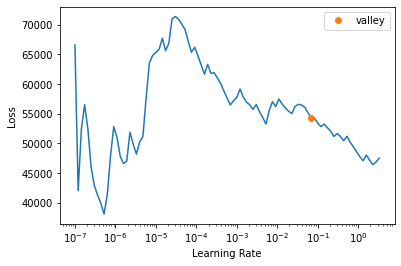

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  110.18      93.04
1  100.28     119.42
2  110.89     106.19
3   97.39     110.80
4   62.41      58.46
XGBoost RMSE:  44.66788


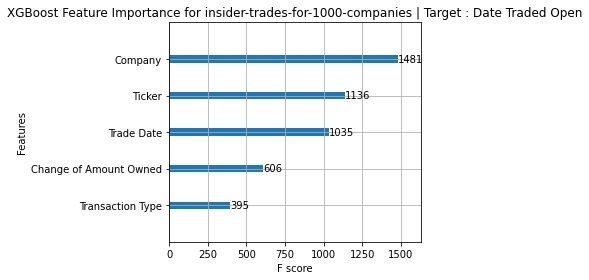

Target Variable: Date Filed Close
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Traded Open', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Traded Open', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabular Object si

  2%|▏         | 1/42 [00:00<00:09,  4.52it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.45474719959145005, 'Adjusted R-Squared': -0.4571300778872589, 'RMSE': 218.75306947522495, 'Time taken': 0.22058987617492676}


 10%|▉         | 4/42 [00:01<00:08,  4.47it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9434595576074931, 'Adjusted R-Squared': 0.9433669442702408, 'RMSE': 43.12608075785853, 'Time taken': 0.5996229648590088}
{'Model': 'BayesianRidge', 'R-Squared': 0.02407994023086968, 'Adjusted R-Squared': 0.022481381574409265, 'RMSE': 179.17091564955308, 'Time taken': 0.03105473518371582}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8923898063698108, 'Adjusted R-Squared': 0.8922135406963789, 'RMSE': 59.49590802835256, 'Time taken': 0.1516420841217041}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005509773392524675, 'Adjusted R-Squared': -0.0021898814790382026, 'RMSE': 181.41783, 'Time taken': 0.011180400848388672}
{'Model': 'ElasticNet', 'R-Squared': 0.02081119887046634, 'Adjusted R-Squared': 0.019207286010303415, 'RMSE': 179.4707218641252, 'Time taken': 0.017410755157470703}


 19%|█▉        | 8/42 [00:01<00:04,  7.25it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.02411148994801804, 'Adjusted R-Squared': 0.022512982970046003, 'RMSE': 179.1680194915429, 'Time taken': 0.21688365936279297}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.24689721654015284, 'Adjusted R-Squared': 0.24566363294726212, 'RMSE': 157.39376241386552, 'Time taken': 0.11955142021179199}


 21%|██▏       | 9/42 [00:03<00:19,  1.66it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8892441734658706, 'Adjusted R-Squared': 0.8890627552405894, 'RMSE': 60.35922875678887, 'Time taken': 2.111945390701294}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:15<07:37, 14.76s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -744991.5018156399, 'Adjusted R-Squared': -746211.8007539128, 'RMSE': 156543.9693118921, 'Time taken': 71.75872373580933}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.018454193059183166, 'Adjusted R-Squared': 0.0168464194196406, 'RMSE': 179.68659406405112, 'Time taken': 0.03128767013549805}


 31%|███       | 13/42 [01:16<04:38,  9.61s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7498805209210464, 'Adjusted R-Squared': 0.7494708248046189, 'RMSE': 90.70561002733346, 'Time taken': 1.241123914718628}


 36%|███▌      | 15/42 [01:17<02:42,  6.02s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8425950252161204, 'Adjusted R-Squared': 0.8423371956095949, 'RMSE': 71.95643155045839, 'Time taken': 0.5629382133483887}
{'Model': 'HuberRegressor', 'R-Squared': -0.020826298442125468, 'Adjusted R-Squared': -0.022498413591088617, 'RMSE': 183.24676464287506, 'Time taken': 0.15494704246520996}


 38%|███▊      | 16/42 [01:17<01:59,  4.58s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.03209329996666854, 'Adjusted R-Squared': 0.030507867206581274, 'RMSE': 178.4338, 'Time taken': 0.1645362377166748}


 45%|████▌     | 19/42 [01:50<02:39,  6.92s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.41145908105921514, 'Adjusted R-Squared': -0.4137710533459622, 'RMSE': 215.47383278030182, 'Time taken': 33.1997492313385}
{'Model': 'Lars', 'R-Squared': 0.024128734146801167, 'Adjusted R-Squared': 0.022530255414854983, 'RMSE': 179.1664365122576, 'Time taken': 0.03496527671813965}
{'Model': 'LarsCV', 'R-Squared': 0.024128734146801167, 'Adjusted R-Squared': 0.022530255414854983, 'RMSE': 179.1664365122576, 'Time taken': 0.09518027305603027}
{'Model': 'Lasso', 'R-Squared': 0.02362556693966056, 'Adjusted R-Squared': 0.02202626401900487, 'RMSE': 179.2126203999361, 'Time taken': 0.04220104217529297}


 55%|█████▍    | 23/42 [01:51<00:54,  2.88s/it]

{'Model': 'LassoCV', 'R-Squared': 0.024023196101731537, 'Adjusted R-Squared': 0.022424544498294674, 'RMSE': 179.17612445210372, 'Time taken': 0.4228842258453369}
{'Model': 'LassoLars', 'R-Squared': -0.0005509713763323099, 'Adjusted R-Squared': -0.002189875506350747, 'RMSE': 181.41784327219037, 'Time taken': 0.04355144500732422}
{'Model': 'LassoLarsCV', 'R-Squared': 0.024128734146801167, 'Adjusted R-Squared': 0.022530255414854983, 'RMSE': 179.1664365122576, 'Time taken': 0.10903263092041016}


 60%|█████▉    | 25/42 [01:51<00:33,  1.94s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.024128734146801167, 'Adjusted R-Squared': 0.022530255414854983, 'RMSE': 179.1664365122576, 'Time taken': 0.05685019493103027}
{'Model': 'LinearRegression', 'R-Squared': 0.024128734146657282, 'Adjusted R-Squared': 0.022530255414710876, 'RMSE': 179.16643651227082, 'Time taken': 0.06714677810668945}
{'Model': 'LinearSVR', 'R-Squared': -0.03350045639341204, 'Adjusted R-Squared': -0.03519333183385975, 'RMSE': 184.3808136253717, 'Time taken': 0.10125589370727539}


 64%|██████▍   | 27/42 [02:12<01:09,  4.62s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.03705843742087267, 'Adjusted R-Squared': 0.035481137564068344, 'RMSE': 177.9755553562133, 'Time taken': 20.370820999145508}


 71%|███████▏  | 30/42 [02:24<00:47,  3.94s/it]

{'Model': 'NuSVR', 'R-Squared': -0.009415531848221192, 'Adjusted R-Squared': -0.01106895614281278, 'RMSE': 182.2197230214468, 'Time taken': 12.072500228881836}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.021823354180330545, 'Adjusted R-Squared': 0.02022109923222304, 'RMSE': 179.37794138595942, 'Time taken': 0.026253700256347656}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.024001550086564016, 'Adjusted R-Squared': 0.02240286302691885, 'RMSE': 179.17811139871324, 'Time taken': 0.09762191772460938}


 76%|███████▌  | 32/42 [02:24<00:26,  2.66s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.0487658987615629, 'Adjusted R-Squared': -0.050483779021614605, 'RMSE': 185.73753155251669, 'Time taken': 0.08037781715393066}
{'Model': 'PoissonRegressor', 'R-Squared': 0.020322814329088, 'Adjusted R-Squared': 0.018718101494246353, 'RMSE': 179.5154730906231, 'Time taken': 0.09267568588256836}
{'Model': 'RANSACRegressor', 'R-Squared': -0.06341517773366578, 'Adjusted R-Squared': -0.06515705353666923, 'RMSE': 187.03023432458411, 'Time taken': 0.2482013702392578}


 88%|████████▊ | 37/42 [02:28<00:07,  1.49s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9485246801340009, 'Adjusted R-Squared': 0.9484403634757438, 'RMSE': 41.149059901592814, 'Time taken': 4.008965730667114}
{'Model': 'Ridge', 'R-Squared': 0.02414588724969058, 'Adjusted R-Squared': 0.02254743661455505, 'RMSE': 179.16486188149824, 'Time taken': 0.01951003074645996}
{'Model': 'RidgeCV', 'R-Squared': 0.024369843032683414, 'Adjusted R-Squared': 0.0227717592374872, 'RMSE': 179.14430178505987, 'Time taken': 0.03359389305114746}
{'Model': 'SGDRegressor', 'R-Squared': 0.020762249768385366, 'Adjusted R-Squared': 0.01915825672951299, 'RMSE': 179.47520762871383, 'Time taken': 0.06752538681030273}


 90%|█████████ | 38/42 [02:39<00:12,  3.06s/it]

{'Model': 'SVR', 'R-Squared': -0.02747399337444878, 'Adjusted R-Squared': -0.02915699745860012, 'RMSE': 183.84245453702547, 'Time taken': 11.103271245956421}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.024128734146657282, 'Adjusted R-Squared': 0.022530255414710876, 'RMSE': 179.16643651227082, 'Time taken': 0.022444963455200195}
{'Model': 'TweedieRegressor', 'R-Squared': 0.018454193059183166, 'Adjusted R-Squared': 0.0168464194196406, 'RMSE': 179.68659406405112, 'Time taken': 0.06189727783203125}


 98%|█████████▊| 41/42 [02:40<00:01,  1.93s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9457367186852719, 'Adjusted R-Squared': 0.945647835341595, 'RMSE': 42.248707, 'Time taken': 0.8786051273345947}


100%|██████████| 42/42 [02:41<00:00,  3.84s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8572689468243695, 'Adjusted R-Squared': 0.8570351531254741, 'RMSE': 68.52035839570334, 'Time taken': 0.2364499568939209}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Date Filed Close
Date Filed Close
Target Standard Deviation: 211.2395477294922
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        0.95       0.95     41.15   
XGBRegressor                                 0.95       0.95     42.25   
BaggingRegressor                             0.94       0.94     43.13   
DecisionTreeRegressor                        0.89       0.89     59.50   
ExtraTreesRegressor                          0.89       0.89     60.36   
LGBMRegressor                                0.86       0.86     68.52   
HistGradientBoostingRegressor                0.84       0.84     71.96   
Gradien

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,47086.441406,33189.390625,182.179565,00:09
1,36012.445312,65833.148438,256.579712,00:10


Better model found at epoch 0 with _rmse value: 182.1795654296875.
No improvement since epoch 0: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Date Filed Close,Date Filed Close_pred
0,103.00,40.00,629.00,2.00,96.00,96.00,65.44,90.25
1,536.00,286.00,506.00,2.00,27.00,27.00,0.00,102.66
2,103.00,561.00,629.00,3.00,45.00,45.00,54.88,99.85
3,448.00,200.00,421.00,3.00,43.00,43.00,114.69,84.75
4,470.00,306.00,444.00,3.00,8.00,8.00,52.06,91.64
5,343.00,164.00,316.00,2.00,10.00,10.00,84.91,90.91
6,533.00,210.00,493.00,3.00,14.00,14.00,27.76,89.74
7,551.00,366.00,523.00,3.00,40.00,40.00,192.94,91.99
8,304.00,215.00,272.00,2.00,95.00,95.00,5.88,94.00


<Figure size 432x288 with 0 Axes>

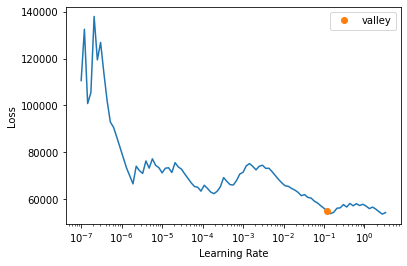

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   86.99      82.95
1   28.76      31.67
2  139.21     119.95
3   12.02      17.42
4   43.86      58.09
XGBoost RMSE:  42.23833


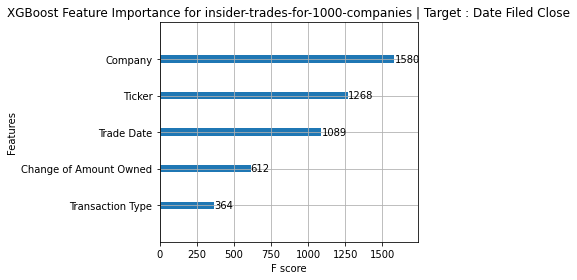

Target Variable: Date Filed Open
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Quantity', 'Owned', 'Value', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Quantity', 'Owned', 'Value', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabular Object s

  2%|▏         | 1/42 [00:00<00:08,  4.92it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.07810104293867748, 'Adjusted R-Squared': -0.07986697421294231, 'RMSE': 222.08851208876763, 'Time taken': 0.20325112342834473}


 10%|▉         | 4/42 [00:00<00:06,  5.47it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9105990208297391, 'Adjusted R-Squared': 0.9104525818794192, 'RMSE': 63.95396856770914, 'Time taken': 0.40633153915405273}
{'Model': 'BayesianRidge', 'R-Squared': 0.023266307033556255, 'Adjusted R-Squared': 0.021666415644585935, 'RMSE': 211.39000353455097, 'Time taken': 0.03136301040649414}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8849687384981781, 'Adjusted R-Squared': 0.8847803171034168, 'RMSE': 72.5444684186653, 'Time taken': 0.16546201705932617}
{'Model': 'DummyRegressor', 'R-Squared': -0.0004294118321808149, 'Adjusted R-Squared': -0.002068116847466772, 'RMSE': 213.93881, 'Time taken': 0.012060880661010742}
{'Model': 'ElasticNet', 'R-Squared': 0.018259706535144637, 'Adjusted R-Squared': 0.01665161432635709, 'RMSE': 211.9310888564532, 'Time taken': 0.019304990768432617}


 19%|█▉        | 8/42 [00:01<00:05,  5.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.023133482421054508, 'Adjusted R-Squared': 0.021533373465151384, 'RMSE': 211.404376357465, 'Time taken': 0.5262110233306885}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6440870038782414, 'Adjusted R-Squared': 0.6435040178076079, 'RMSE': 127.60517417916977, 'Time taken': 0.12145781517028809}


 21%|██▏       | 9/42 [00:03<00:21,  1.54it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8462713098833644, 'Adjusted R-Squared': 0.8460195020371455, 'RMSE': 83.86366244849809, 'Time taken': 2.2149596214294434}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:15<07:38, 14.80s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -4820.128822104653, 'Adjusted R-Squared': -4828.025839012277, 'RMSE': 14851.514017599704, 'Time taken': 71.80017757415771}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.015458512117489498, 'Adjusted R-Squared': 0.013845831547657506, 'RMSE': 212.233224420299, 'Time taken': 0.03640007972717285}


 31%|███       | 13/42 [01:16<04:39,  9.63s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7650151401393198, 'Adjusted R-Squared': 0.7646302345539624, 'RMSE': 103.68508836773742, 'Time taken': 1.2046759128570557}


 36%|███▌      | 15/42 [01:17<02:42,  6.02s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.895555350494394, 'Adjusted R-Squared': 0.8953842699874234, 'RMSE': 69.12568688781482, 'Time taken': 0.5640618801116943}
{'Model': 'HuberRegressor', 'R-Squared': -0.02554891785717217, 'Adjusted R-Squared': -0.02722876866447299, 'RMSE': 216.60802959833273, 'Time taken': 0.13950014114379883}


 38%|███▊      | 16/42 [01:17<01:59,  4.58s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.13134882159592687, 'Adjusted R-Squared': 0.12992596954284907, 'RMSE': 199.3513, 'Time taken': 0.14412236213684082}


 48%|████▊     | 20/42 [01:52<02:09,  5.86s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.3249451199584261, 'Adjusted R-Squared': -0.3271153822351802, 'RMSE': 246.20411443766451, 'Time taken': 34.476311683654785}
{'Model': 'Lars', 'R-Squared': 0.02402762251857704, 'Adjusted R-Squared': 0.022428978165618174, 'RMSE': 211.30760346144564, 'Time taken': 0.020580053329467773}
{'Model': 'LarsCV', 'R-Squared': 0.02402762251857704, 'Adjusted R-Squared': 0.022428978165618174, 'RMSE': 211.30760346144564, 'Time taken': 0.07075142860412598}
{'Model': 'Lasso', 'R-Squared': 0.023209746236863893, 'Adjusted R-Squared': 0.02160976220121591, 'RMSE': 211.39612404314553, 'Time taken': 0.029706716537475586}


 57%|█████▋    | 24/42 [01:52<00:48,  2.70s/it]

{'Model': 'LassoCV', 'R-Squared': 0.023340380798901772, 'Adjusted R-Squared': 0.021740610742880362, 'RMSE': 211.38198765953834, 'Time taken': 0.296414852142334}
{'Model': 'LassoLars', 'R-Squared': -0.0004294449068353856, 'Adjusted R-Squared': -0.002068149976297784, 'RMSE': 213.93881905929783, 'Time taken': 0.04459810256958008}
{'Model': 'LassoLarsCV', 'R-Squared': 0.02402762251857704, 'Adjusted R-Squared': 0.022428978165618174, 'RMSE': 211.30760346144564, 'Time taken': 0.08148908615112305}
{'Model': 'LassoLarsIC', 'R-Squared': 0.02402762251857704, 'Adjusted R-Squared': 0.022428978165618174, 'RMSE': 211.30760346144564, 'Time taken': 0.026102304458618164}
{'Model': 'LinearRegression', 'R-Squared': 0.024027622518580594, 'Adjusted R-Squared': 0.022428978165621727, 'RMSE': 211.30760346144524, 'Time taken': 0.021794795989990234}
{'Model': 'LinearSVR', 'R-Squared': -0.035882278681564905, 'Adjusted R-Squared': -0.03757905555082197, 'RMSE': 217.6965583385709, 'Time taken': 0.037129878997802734}

 64%|██████▍   | 27/42 [02:13<01:06,  4.46s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.03667985806965246, 'Adjusted R-Squared': 0.03510193809925066, 'RMSE': 209.93346883971483, 'Time taken': 20.972187995910645}


 74%|███████▍  | 31/42 [02:25<00:36,  3.32s/it]

{'Model': 'NuSVR', 'R-Squared': -0.017772896959181494, 'Adjusted R-Squared': -0.019440010631514237, 'RMSE': 215.78527336159178, 'Time taken': 11.510340929031372}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.02017382023229619, 'Adjusted R-Squared': 0.01856886334487995, 'RMSE': 211.72438545120218, 'Time taken': 0.02400064468383789}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.023806932015130067, 'Adjusted R-Squared': 0.022207926170765058, 'RMSE': 211.33149294158068, 'Time taken': 0.0566558837890625}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.04599967196215804, 'Adjusted R-Squared': -0.0477130211381811, 'RMSE': 218.75708899681328, 'Time taken': 0.0395808219909668}
{'Model': 'PoissonRegressor', 'R-Squared': 0.021015471005307207, 'Adjusted R-Squared': 0.019411892743235737, 'RMSE': 211.63343244345535, 'Time taken': 0.07015585899353027}


 79%|███████▊  | 33/42 [02:25<00:21,  2.42s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.07608990530357573, 'Adjusted R-Squared': -0.07785254233109984, 'RMSE': 221.8812684992716, 'Time taken': 0.1878187656402588}


 83%|████████▎ | 35/42 [02:30<00:16,  2.38s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9307791023816196, 'Adjusted R-Squared': 0.9306657184379368, 'RMSE': 56.27493146414976, 'Time taken': 4.501738786697388}
{'Model': 'Ridge', 'R-Squared': 0.023482797477670014, 'Adjusted R-Squared': 0.021883260700401808, 'RMSE': 211.36657521820445, 'Time taken': 0.01580524444580078}
{'Model': 'RidgeCV', 'R-Squared': 0.02389519083903857, 'Adjusted R-Squared': 0.02229632956277172, 'RMSE': 211.32193935467393, 'Time taken': 0.03139853477478027}
{'Model': 'SGDRegressor', 'R-Squared': 0.02260350958397639, 'Adjusted R-Squared': 0.021002532531698037, 'RMSE': 211.46171448060122, 'Time taken': 0.05326032638549805}


 90%|█████████ | 38/42 [02:41<00:11,  2.91s/it]

{'Model': 'SVR', 'R-Squared': -0.03359290838355933, 'Adjusted R-Squared': -0.035285935260518375, 'RMSE': 217.45586317586898, 'Time taken': 11.250731229782104}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.024027622518580594, 'Adjusted R-Squared': 0.022428978165621727, 'RMSE': 211.30760346144524, 'Time taken': 0.0177304744720459}
{'Model': 'TweedieRegressor', 'R-Squared': 0.015458512117489498, 'Adjusted R-Squared': 0.013845831547657506, 'RMSE': 212.233224420299, 'Time taken': 0.026645660400390625}


 98%|█████████▊| 41/42 [02:42<00:01,  1.99s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9510352691156506, 'Adjusted R-Squared': 0.9509550648062578, 'RMSE': 47.330166, 'Time taken': 0.8720636367797852}


100%|██████████| 42/42 [02:42<00:00,  3.87s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8950944198530894, 'Adjusted R-Squared': 0.8949225843409732, 'RMSE': 69.27805022824701, 'Time taken': 0.2544279098510742}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Date Filed Open
Date Filed Open
Target Standard Deviation: 203.14024353027344
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
XGBRegressor                                 0.95       0.95    47.33   
RandomForestRegressor                        0.93       0.93    56.27   
BaggingRegressor                             0.91       0.91    63.95   
HistGradientBoostingRegressor                0.90       0.90    69.13   
LGBMRegressor                                0.89       0.90    69.28   
DecisionTreeRegressor                        0.88       0.88    72.54   
ExtraTreesRegressor                          0.85       0.85    83.86   
GradientBoostingR

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,38353.320312,46258.613281,215.078125,00:08
1,32486.287109,34802.246094,186.553604,00:09
2,14767.174805,73366.929688,270.863312,00:09


Better model found at epoch 0 with _rmse value: 215.078125.
Better model found at epoch 1 with _rmse value: 186.55360412597656.
No improvement since epoch 1: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Date Filed Open,Date Filed Open_pred
0,368.00,326.00,344.00,3.00,69.00,69.00,132.88,121.09
1,311.00,138.00,603.00,3.00,37.00,37.00,63.91,131.96
2,86.00,37.00,39.00,2.00,14.00,14.00,88.72,92.31
3,22.00,525.00,24.00,2.00,27.00,27.00,304.53,87.65
4,158.00,130.00,9.00,2.00,108.00,107.00,0.00,92.19
5,459.00,179.00,431.00,1.00,116.00,115.00,4.48,171.65
6,381.00,283.00,349.00,3.00,56.00,56.00,24.37,85.27
7,391.00,481.00,359.00,2.00,63.00,63.00,114.24,79.11
8,76.00,110.00,147.00,3.00,52.00,52.00,146.84,61.29


<Figure size 432x288 with 0 Axes>

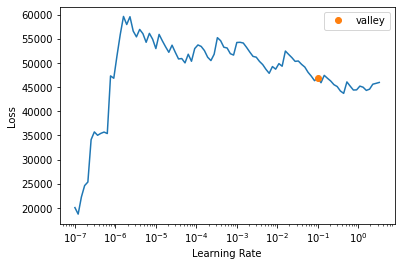

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   31.56      26.06
1  375.93     362.56
2   79.39      95.70
3  218.04     242.89
4   21.41      57.11
XGBoost RMSE:  47.339516


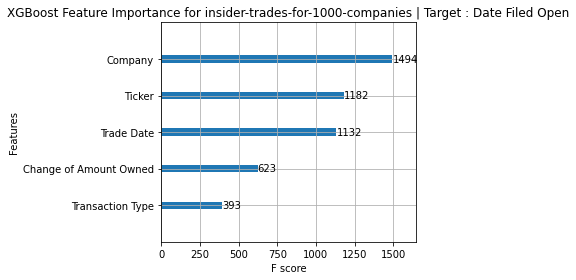

Target Variable: Value
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Quantity', 'Owned', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Quantity', 'Owned', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabula

  2%|▏         | 1/42 [00:00<00:06,  6.12it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.3240167185484777, 'Adjusted R-Squared': -0.3261854601022016, 'RMSE': 55801209.19246291, 'Time taken': 0.16326236724853516}


 10%|▉         | 4/42 [00:00<00:07,  5.32it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.11703544144499523, 'Adjusted R-Squared': 0.11558914405178478, 'RMSE': 45568896.45667821, 'Time taken': 0.4989626407623291}
{'Model': 'BayesianRidge', 'R-Squared': -0.000537964843420502, 'Adjusted R-Squared': -0.0021768476687167304, 'RMSE': 48508032.704156525, 'Time taken': 0.017740249633789062}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.3341066600120679, 'Adjusted R-Squared': -0.33629192890643633, 'RMSE': 56013427.93605741, 'Time taken': 0.15014195442199707}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005379968005319036, 'Adjusted R-Squared': -0.0021768796781740374, 'RMSE': 48508030.0, 'Time taken': 0.011061906814575195}
{'Model': 'ElasticNet', 'R-Squared': 0.0023634083056270905, 'Adjusted R-Squared': 0.0007292779343014422, 'RMSE': 48437649.52700179, 'Time taken': 0.016263246536254883}


 17%|█▋        | 7/42 [00:01<00:04,  8.02it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.0005319197525783803, 'Adjusted R-Squared': -0.0021707926760059504, 'RMSE': 48507886.16503582, 'Time taken': 0.20494580268859863}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.06863762292380948, 'Adjusted R-Squared': -0.07038805310058871, 'RMSE': 50131662.3094633, 'Time taken': 0.0616765022277832}


 21%|██▏       | 9/42 [00:03<00:17,  1.85it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.1679695921585851, 'Adjusted R-Squared': 0.16660672498767382, 'RMSE': 44235045.141527615, 'Time taken': 2.5341880321502686}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:15<06:24, 12.40s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -18654.864331756064, 'Adjusted R-Squared': -18685.422668089814, 'RMSE': 6623759615.081328, 'Time taken': 71.81985116004944}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0019708526143175087, 'Adjusted R-Squared': 0.00033607923612644086, 'RMSE': 48447178.349942364, 'Time taken': 0.05989265441894531}


 33%|███▎      | 14/42 [01:16<03:16,  7.00s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.08886819107901844, 'Adjusted R-Squared': 0.08737575568357059, 'RMSE': 46290031.882179394, 'Time taken': 1.2044751644134521}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.09589215501534498, 'Adjusted R-Squared': 0.09441122488433007, 'RMSE': 46111260.507989615, 'Time taken': 0.12666726112365723}


 38%|███▊      | 16/42 [01:17<01:51,  4.30s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.0017333552297804644, 'Adjusted R-Squared': -0.0033741961064877035, 'RMSE': 48537001.48328394, 'Time taken': 0.15143752098083496}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.01060173060764602, 'Adjusted R-Squared': -0.012257097897748537, 'RMSE': 48751380.0, 'Time taken': 0.1587822437286377}


 45%|████▌     | 19/42 [01:50<02:34,  6.71s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.0007768673908685741, 'Adjusted R-Squared': -0.0024161415389287733, 'RMSE': 48513823.5893126, 'Time taken': 32.91562509536743}
{'Model': 'Lars', 'R-Squared': 0.003947256103339569, 'Adjusted R-Squared': 0.0023157200773009645, 'RMSE': 48399184.44929578, 'Time taken': 0.05541586875915527}
{'Model': 'LarsCV', 'R-Squared': 0.003947256103339569, 'Adjusted R-Squared': 0.0023157200773009645, 'RMSE': 48399184.44929578, 'Time taken': 0.08298850059509277}


 48%|████▊     | 20/42 [01:50<01:54,  5.22s/it]

{'Model': 'Lasso', 'R-Squared': 0.0029602953890907058, 'Adjusted R-Squared': 0.0013271427197855123, 'RMSE': 48423157.20916655, 'Time taken': 0.22198843955993652}


 55%|█████▍    | 23/42 [01:51<00:46,  2.42s/it]

{'Model': 'LassoCV', 'R-Squared': 0.0029385066001356153, 'Adjusted R-Squared': 0.001305318240758413, 'RMSE': 48423686.31356622, 'Time taken': 0.5193521976470947}
{'Model': 'LassoLars', 'R-Squared': 0.0038987653789462895, 'Adjusted R-Squared': 0.0022671499250216387, 'RMSE': 48400362.54100099, 'Time taken': 0.06144213676452637}
{'Model': 'LassoLarsCV', 'R-Squared': 0.003947256103339569, 'Adjusted R-Squared': 0.0023157200773009645, 'RMSE': 48399184.44929578, 'Time taken': 0.11322164535522461}


 62%|██████▏   | 26/42 [01:51<00:20,  1.31s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.003947256103339569, 'Adjusted R-Squared': 0.0023157200773009645, 'RMSE': 48399184.44929578, 'Time taken': 0.03304600715637207}
{'Model': 'LinearRegression', 'R-Squared': 0.003947256103356223, 'Adjusted R-Squared': 0.002315720077317618, 'RMSE': 48399184.44929537, 'Time taken': 0.042301177978515625}
{'Model': 'LinearSVR', 'R-Squared': -0.004301793180488955, 'Adjusted R-Squared': -0.0059468411627665585, 'RMSE': 48599185.93019775, 'Time taken': 0.0575253963470459}


 64%|██████▍   | 27/42 [02:11<01:11,  4.77s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.004281509316885979, 'Adjusted R-Squared': -0.005926524074161721, 'RMSE': 48598695.14931754, 'Time taken': 20.24704146385193}


 67%|██████▋   | 28/42 [02:21<01:22,  5.91s/it]

{'Model': 'NuSVR', 'R-Squared': -0.0024553611074713544, 'Adjusted R-Squared': -0.004097384630988854, 'RMSE': 48554490.01349005, 'Time taken': 10.299180746078491}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.002716042986312228, 'Adjusted R-Squared': 0.0010824902311711293, 'RMSE': 48429088.14058583, 'Time taken': 0.02259993553161621}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.003001784399870977, 'Adjusted R-Squared': 0.0013686996896333792, 'RMSE': 48422149.70175103, 'Time taken': 0.06292033195495605}


 74%|███████▍  | 31/42 [02:23<00:36,  3.32s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.002144655904259274, 'Adjusted R-Squared': -0.0037861704921449135, 'RMSE': 48546964.83959314, 'Time taken': 1.094928503036499}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [02:23<00:21,  2.33s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.0037896645145760743, 'Adjusted R-Squared': -0.0054338736292600665, 'RMSE': 48586793.13642748, 'Time taken': 0.253345251083374}


 88%|████████▊ | 37/42 [02:28<00:08,  1.62s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.13779975334454153, 'Adjusted R-Squared': 0.13638746792823453, 'RMSE': 45029896.309082784, 'Time taken': 5.152039051055908}
{'Model': 'Ridge', 'R-Squared': 0.0030825962325731204, 'Adjusted R-Squared': 0.0014496438922498855, 'RMSE': 48420187.22985458, 'Time taken': 0.019660234451293945}
{'Model': 'RidgeCV', 'R-Squared': 0.0035734194577792255, 'Adjusted R-Squared': 0.0019412710867028338, 'RMSE': 48408266.14275909, 'Time taken': 0.029792308807373047}
{'Model': 'SGDRegressor', 'R-Squared': 0.0024853786856551263, 'Adjusted R-Squared': 0.0008514481020117648, 'RMSE': 48434688.459236, 'Time taken': 0.054723501205444336}


 90%|█████████ | 38/42 [02:38<00:12,  3.07s/it]

{'Model': 'SVR', 'R-Squared': -0.0033463293449937925, 'Adjusted R-Squared': -0.00498981227594375, 'RMSE': 48576062.495420635, 'Time taken': 10.049861669540405}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.003947256103356223, 'Adjusted R-Squared': 0.002315720077317618, 'RMSE': 48399184.44929537, 'Time taken': 0.017303466796875}
{'Model': 'TweedieRegressor', 'R-Squared': 0.0019708526143175087, 'Adjusted R-Squared': 0.00033607923612644086, 'RMSE': 48447178.349942364, 'Time taken': 0.03376007080078125}


 98%|█████████▊| 41/42 [02:39<00:01,  1.90s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.11660480768490755, 'Adjusted R-Squared': 0.11515780491289274, 'RMSE': 45580010.0, 'Time taken': 0.861504077911377}


100%|██████████| 42/42 [02:39<00:00,  3.80s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.09351042659234587, 'Adjusted R-Squared': 0.09202559518627285, 'RMSE': 46171956.95404768, 'Time taken': 0.23189234733581543}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Value
Value
Target Standard Deviation: 39056192.0
                               Adjusted R-Squared  R-Squared          RMSE  \
Model                                                                        
ExtraTreesRegressor                          0.17       0.17   44235045.14   
RandomForestRegressor                        0.14       0.14   45029896.31   
BaggingRegressor                             0.12       0.12   45568896.46   
XGBRegressor                                 0.12       0.12   45580008.00   
HistGradientBoostingRegressor                0.09       0.10   46111260.51   
LGBMRegressor                                0.09       0.09   46171956.95   
GradientBoostingRegressor                    0.09       0.09   46290031.88 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1313626216464384.000000,2362014580080640.000000,48600556.000000,00:09
1,1183943034404864.000000,2361910695559168.000000,48599492.000000,00:09
2,2003215562309632.000000,2361112636948480.000000,48591284.000000,00:09
3,1201431738580992.000000,2357133081313280.000000,48550312.000000,00:09
4,1154452178337792.000000,2356208858038272.000000,48540800.000000,00:09
5,1700033686667264.000000,2355158470098944.000000,48529968.000000,00:09
6,1841776600023040.000000,2344828805316608.000000,48423428.000000,00:09
7,1463391860293632.000000,2343573064253440.000000,48410468.000000,00:09
8,1715294913429504.000000,2342384968925184.000000,48398188.000000,00:09
9,1501381248679936.000000,2342984116862976.000000,48404380.000000,00:09


Better model found at epoch 0 with _rmse value: 48600556.0.
Better model found at epoch 1 with _rmse value: 48599492.0.
Better model found at epoch 2 with _rmse value: 48591284.0.
Better model found at epoch 3 with _rmse value: 48550312.0.
Better model found at epoch 4 with _rmse value: 48540800.0.
Better model found at epoch 5 with _rmse value: 48529968.0.
Better model found at epoch 6 with _rmse value: 48423428.0.
Better model found at epoch 7 with _rmse value: 48410468.0.
Better model found at epoch 8 with _rmse value: 48398188.0.
No improvement since epoch 8: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Value,Value_pred
0,66.00,485.00,69.00,2.00,1.00,1.00,-395685.00,-1279569.88
1,103.00,393.00,629.00,3.00,27.00,27.00,-2421840.00,-1553199.50
2,241.00,345.00,125.00,2.00,40.00,40.00,-40424.00,-1348801.88
3,379.00,141.00,434.00,2.00,14.00,14.00,-98755.00,-1382882.38
4,232.00,89.00,167.00,1.00,108.00,107.00,101390.00,-1283953.75
5,500.00,188.00,470.00,3.00,1.00,1.00,-40041.00,-1356903.25
6,426.00,525.00,396.00,2.00,15.00,15.00,-13429419.00,-1500361.12
7,338.00,205.00,486.00,3.00,10.00,10.00,-1535796.00,-1531149.38
8,500.00,100.00,470.00,2.00,17.00,17.00,-2512924.00,-1424719.88


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
       actual   predicted
0   -53627.00   162690.06
1  -788477.00 -6994312.00
2  -857246.00  -890094.88
3 -1843417.00 -7720184.00
4 -1435801.00 -1460823.75
XGBoost RMSE:  45506964.0


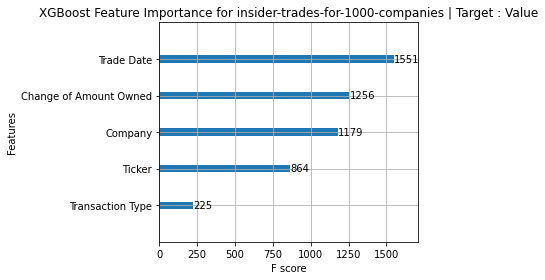

Target Variable: Owned
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Quantity', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Quantity', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabula

  2%|▏         | 1/42 [00:00<00:20,  1.95it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -15.901585748867173, 'Adjusted R-Squared': -15.92927057400864, 'RMSE': 57143120.2908772, 'Time taken': 0.5115046501159668}


  5%|▍         | 2/42 [00:00<00:19,  2.03it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.5776134203976244, 'Adjusted R-Squared': 0.5769215504883658, 'RMSE': 9033484.01121862, 'Time taken': 0.4798436164855957}
{'Model': 'BayesianRidge', 'R-Squared': -0.00027431005411382436, 'Adjusted R-Squared': -0.0019127610124334282, 'RMSE': 13901439.764339216, 'Time taken': 0.0297238826751709}


 10%|▉         | 4/42 [00:01<00:10,  3.76it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.019003788648808806, 'Adjusted R-Squared': -0.02067291852374531, 'RMSE': 14030983.828302525, 'Time taken': 0.22954773902893066}
{'Model': 'DummyRegressor', 'R-Squared': -0.000274310047257309, 'Adjusted R-Squared': -0.0019127610055655886, 'RMSE': 13901440.0, 'Time taken': 0.01834416389465332}
{'Model': 'ElasticNet', 'R-Squared': 0.008185138692857752, 'Adjusted R-Squared': 0.006560544325442397, 'RMSE': 13842531.818073679, 'Time taken': 0.0266721248626709}


 19%|█▉        | 8/42 [00:01<00:06,  5.39it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.00023991280456825415, 'Adjusted R-Squared': -0.0018783074201367267, 'RMSE': 13901200.74220364, 'Time taken': 0.43493199348449707}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.258587731537369, 'Adjusted R-Squared': 0.2573732970271928, 'RMSE': 11968235.01956443, 'Time taken': 0.10862040519714355}


 21%|██▏       | 9/42 [00:04<00:21,  1.51it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.342078186884036, 'Adjusted R-Squared': 0.3410005098764751, 'RMSE': 11274242.38433943, 'Time taken': 2.2128114700317383}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:16<07:41, 14.88s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -33780.53574554716, 'Adjusted R-Squared': -33835.86995643257, 'RMSE': 2554700066.5548987, 'Time taken': 72.18570041656494}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.008634697347428388, 'Adjusted R-Squared': 0.007010839357825538, 'RMSE': 13839394.269142492, 'Time taken': 0.05597186088562012}


 31%|███       | 13/42 [01:17<04:40,  9.69s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.4359792924808018, 'Adjusted R-Squared': 0.4350554256380186, 'RMSE': 10438732.033750592, 'Time taken': 1.1964142322540283}


 36%|███▌      | 15/42 [01:19<02:48,  6.23s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6399082464003043, 'Adjusted R-Squared': 0.6393184155180771, 'RMSE': 8340782.81164956, 'Time taken': 1.584294319152832}
{'Model': 'HuberRegressor', 'R-Squared': -0.024651460353152688, 'Adjusted R-Squared': -0.026329841123591713, 'RMSE': 14069812.38677353, 'Time taken': 0.16823458671569824}


 38%|███▊      | 16/42 [01:19<02:03,  4.73s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.31399840050043826, 'Adjusted R-Squared': 0.31287472875678635, 'RMSE': 11512318.0, 'Time taken': 0.13904619216918945}


 45%|████▌     | 19/42 [01:53<02:41,  7.04s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.006066342440958827, 'Adjusted R-Squared': -0.007714280757815439, 'RMSE': 13941629.423629586, 'Time taken': 33.56379842758179}
{'Model': 'Lars', 'R-Squared': 0.062212772151013396, 'Adjusted R-Squared': 0.060676675135699853, 'RMSE': 13460226.919487348, 'Time taken': 0.023749351501464844}
{'Model': 'LarsCV', 'R-Squared': 0.062212772151013396, 'Adjusted R-Squared': 0.060676675135699853, 'RMSE': 13460226.919487348, 'Time taken': 0.07593226432800293}


 48%|████▊     | 20/42 [01:53<01:59,  5.44s/it]

{'Model': 'Lasso', 'R-Squared': 0.008477938668192131, 'Adjusted R-Squared': 0.006853823907616019, 'RMSE': 13840488.396306152, 'Time taken': 0.1898667812347412}


 55%|█████▍    | 23/42 [01:53<00:47,  2.49s/it]

{'Model': 'LassoCV', 'R-Squared': 0.00800297992366994, 'Adjusted R-Squared': 0.0063780871798923, 'RMSE': 13843802.933727251, 'Time taken': 0.5256736278533936}
{'Model': 'LassoLars', 'R-Squared': 0.062490230762798804, 'Adjusted R-Squared': 0.06095458822514577, 'RMSE': 13458235.5657751, 'Time taken': 0.06570959091186523}
{'Model': 'LassoLarsCV', 'R-Squared': 0.06221277215101173, 'Adjusted R-Squared': 0.06067667513569819, 'RMSE': 13460226.91948736, 'Time taken': 0.09636902809143066}
{'Model': 'LassoLarsIC', 'R-Squared': 0.06221277215101173, 'Adjusted R-Squared': 0.06067667513569819, 'RMSE': 13460226.91948736, 'Time taken': 0.035042762756347656}
{'Model': 'LinearRegression', 'R-Squared': 0.06221277215573129, 'Adjusted R-Squared': 0.06067667514042541, 'RMSE': 13460226.91945349, 'Time taken': 0.023069381713867188}
{'Model': 'LinearSVR', 'R-Squared': -0.026677390615902796, 'Adjusted R-Squared': -0.02835908986343072, 'RMSE': 14083714.86192707, 'Time taken': 0.0241241455078125}


 64%|██████▍   | 27/42 [02:12<00:55,  3.70s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.025688914484571113, 'Adjusted R-Squared': -0.027368994606576935, 'RMSE': 14076933.389685826, 'Time taken': 18.772866249084473}


 67%|██████▋   | 28/42 [02:25<01:11,  5.11s/it]

{'Model': 'NuSVR', 'R-Squared': -0.02386123687266628, 'Adjusted R-Squared': -0.025538323255750006, 'RMSE': 14064385.936408632, 'Time taken': 12.392045736312866}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.006221521803457808, 'Adjusted R-Squared': 0.004593711028361147, 'RMSE': 13856227.917029923, 'Time taken': 0.024825096130371094}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.006299347826600243, 'Adjusted R-Squared': 0.004671664530657038, 'RMSE': 13855685.343281452, 'Time taken': 0.07178258895874023}


 74%|███████▍  | 31/42 [02:25<00:33,  3.07s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.025418016263084153, 'Adjusted R-Squared': -0.027097652653359283, 'RMSE': 14075074.313316632, 'Time taken': 0.2993931770324707}
{'Model': 'PoissonRegressor', 'R-Squared': 0.09498263039650923, 'Adjusted R-Squared': 0.09350021046267887, 'RMSE': 13222959.932784203, 'Time taken': 0.09395766258239746}


 79%|███████▊  | 33/42 [02:25<00:20,  2.25s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.026389061718653295, 'Adjusted R-Squared': -0.028070288682975342, 'RMSE': 14081737.109638948, 'Time taken': 0.17993998527526855}


 88%|████████▊ | 37/42 [02:30<00:07,  1.55s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5350861422706488, 'Adjusted R-Squared': 0.5343246126101584, 'RMSE': 9477340.200632244, 'Time taken': 4.507066488265991}
{'Model': 'Ridge', 'R-Squared': 0.019572280126913144, 'Adjusted R-Squared': 0.01796633791581892, 'RMSE': 13762838.55934282, 'Time taken': 0.017434358596801758}
{'Model': 'RidgeCV', 'R-Squared': 0.05554166789928927, 'Adjusted R-Squared': 0.053994643604284076, 'RMSE': 13508017.851011362, 'Time taken': 0.028815746307373047}
{'Model': 'SGDRegressor', 'R-Squared': 0.008533571543856144, 'Adjusted R-Squared': 0.0069095479100214074, 'RMSE': 13840100.105918517, 'Time taken': 0.07538127899169922}


 95%|█████████▌| 40/42 [02:42<00:04,  2.23s/it]

{'Model': 'SVR', 'R-Squared': -0.02558583690067473, 'Adjusted R-Squared': -0.027265748181429128, 'RMSE': 14076226.03450282, 'Time taken': 11.884689807891846}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.06221277215573129, 'Adjusted R-Squared': 0.06067667514042541, 'RMSE': 13460226.91945349, 'Time taken': 0.022368669509887695}
{'Model': 'TweedieRegressor', 'R-Squared': 0.008634697347428388, 'Adjusted R-Squared': 0.007010839357825538, 'RMSE': 13839394.269142492, 'Time taken': 0.07799482345581055}


100%|██████████| 42/42 [02:43<00:00,  3.90s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.14529486018296756, 'Adjusted R-Squared': 0.1438948517639389, 'RMSE': 12850156.0, 'Time taken': 0.868445873260498}
{'Model': 'LGBMRegressor', 'R-Squared': 0.6176053763536803, 'Adjusted R-Squared': 0.6169790133337847, 'RMSE': 8595202.510762665, 'Time taken': 0.19454669952392578}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Owned
Owned
Target Standard Deviation: 17593246.0
                               Adjusted R-Squared  R-Squared          RMSE  \
Model                                                                        
HistGradientBoostingRegressor                0.64       0.64    8340782.81   
LGBMRegressor                                0.62       0.62    8595202.51   
BaggingRegressor                             0.58       0.58    9033484.01   
RandomForestRegressor                        0.53       0.54    9477340.20   
GradientBoostingRegressor                    0.44       0.44   10438732.03   


LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,234124086345728.000000,198391048962048.000000,14085136.000000,00:09
1,388711216840704.000000,198101440659456.000000,14074851.000000,00:09
2,363111198490624.000000,196644121346048.000000,14022985.000000,00:09
3,272781526695936.000000,192239682715648.000000,13865052.000000,00:08
4,269562834583552.000000,185066365911040.000000,13603909.000000,00:09
5,349980946595840.000000,179904754745344.000000,13412858.000000,00:09
6,197956116414464.000000,174209661665280.000000,13198851.000000,00:08
7,168001756200960.000000,165275173388288.000000,12855940.000000,00:09
8,227757518749696.000000,188905898901504.000000,13744304.000000,00:09


Better model found at epoch 0 with _rmse value: 14085136.0.
Better model found at epoch 1 with _rmse value: 14074851.0.
Better model found at epoch 2 with _rmse value: 14022985.0.
Better model found at epoch 3 with _rmse value: 13865052.0.
Better model found at epoch 4 with _rmse value: 13603909.0.
Better model found at epoch 5 with _rmse value: 13412858.0.
Better model found at epoch 6 with _rmse value: 13198851.0.
Better model found at epoch 7 with _rmse value: 12855940.0.
No improvement since epoch 7: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Owned,Owned_pred
0,4.00,38.00,609.00,2.00,5.00,5.00,24602.00,1180064.12
1,359.00,460.00,279.00,2.00,1.00,1.00,32932.00,1505544.38
2,289.00,430.00,278.00,3.00,52.00,52.00,27524.00,1368982.12
3,426.00,86.00,396.00,2.00,28.00,28.00,145004.00,1272620.50
4,404.00,252.00,417.00,3.00,24.00,24.00,19546.00,1298824.12
5,465.00,282.00,435.00,1.00,107.00,107.00,1000.00,1118762.12
6,28.00,127.00,32.00,3.00,27.00,27.00,15036.00,1198515.62
7,556.00,147.00,525.00,1.00,229.00,228.00,3178.00,1298030.25
8,158.00,22.00,142.00,2.00,108.00,107.00,245024.00,1926436.00


<Figure size 432x288 with 0 Axes>

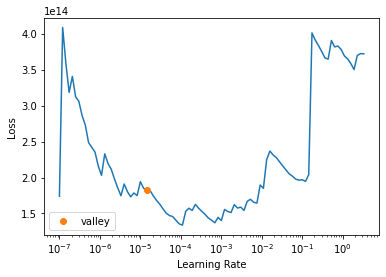

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
     actual  predicted
0 713745.00 1142711.38
1 577380.00 -229438.12
2  58360.00  175990.36
3  30000.00  848433.56
4  36078.00     194.40
XGBoost RMSE:  12848333.0


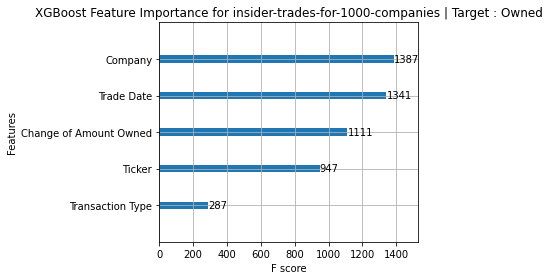

Target Variable: Quantity
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Price', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Price', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabular O

  2%|▏         | 1/42 [00:00<00:19,  2.13it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -21.061560337717744, 'Adjusted R-Squared': -21.097697209687794, 'RMSE': 7209775.052564418, 'Time taken': 0.46947336196899414}


 10%|▉         | 4/42 [00:01<00:09,  4.16it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.15502412453901604, 'Adjusted R-Squared': 0.15364005267093916, 'RMSE': 1410995.916925169, 'Time taken': 0.49873828887939453}
{'Model': 'BayesianRidge', 'R-Squared': -8.329070590784582e-06, 'Adjusted R-Squared': -0.0016463443516236964, 'RMSE': 1534989.5059949337, 'Time taken': 0.031054258346557617}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.06825866446053197, 'Adjusted R-Squared': 0.0667324706267246, 'RMSE': 1481669.3037671375, 'Time taken': 0.1538681983947754}
{'Model': 'DummyRegressor', 'R-Squared': -8.307985515543237e-06, 'Adjusted R-Squared': -0.001646323232010971, 'RMSE': 1534989.4, 'Time taken': 0.011986017227172852}
{'Model': 'ElasticNet', 'R-Squared': -3.170974165911389e-05, 'Adjusted R-Squared': -0.0016697633202693574, 'RMSE': 1535007.4502829541, 'Time taken': 0.019286632537841797}


 17%|█▋        | 7/42 [00:01<00:05,  6.69it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 6.253945708578623e-05, 'Adjusted R-Squared': -0.0015753597411825027, 'RMSE': 1534935.1142611392, 'Time taken': 0.21235179901123047}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -1.016401451794132, 'Adjusted R-Squared': -1.0197043206750394, 'RMSE': 2179676.8058697153, 'Time taken': 0.06180000305175781}


 21%|██▏       | 9/42 [00:03<00:17,  1.85it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.18189936277685614, 'Adjusted R-Squared': 0.18055931259303448, 'RMSE': 1388375.5841297512, 'Time taken': 2.4574403762817383}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:15<06:25, 12.44s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2573.0192620190714, 'Adjusted R-Squared': -2577.235509786506, 'RMSE': 77877051.14703052, 'Time taken': 72.05310940742493}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0002953044699228746, 'Adjusted R-Squared': -0.0013422134588731982, 'RMSE': 1534756.4530948573, 'Time taken': 0.05079531669616699}


 31%|███       | 13/42 [01:17<04:09,  8.61s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.08899082708059458, 'Adjusted R-Squared': 0.0874985925631182, 'RMSE': 1465092.2703491747, 'Time taken': 1.1875619888305664}


 36%|███▌      | 15/42 [01:17<02:31,  5.61s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.11014214653060128, 'Adjusted R-Squared': 0.10868455790902987, 'RMSE': 1447984.5266700778, 'Time taken': 0.4190335273742676}
{'Model': 'HuberRegressor', 'R-Squared': -0.0018044022298702167, 'Adjusted R-Squared': -0.0034453594816798994, 'RMSE': 1536367.3528436073, 'Time taken': 0.1588733196258545}


 38%|███▊      | 16/42 [01:18<01:53,  4.36s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.01658988104546577, 'Adjusted R-Squared': 0.014979053659790909, 'RMSE': 1522197.1, 'Time taken': 0.2114262580871582}


 45%|████▌     | 19/42 [01:51<02:37,  6.86s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.0030212459197502817, 'Adjusted R-Squared': -0.004664196363517226, 'RMSE': 1537300.145490204, 'Time taken': 33.70423889160156}
{'Model': 'Lars', 'R-Squared': -0.0005101221150400903, 'Adjusted R-Squared': -0.00214895933390169, 'RMSE': 1535374.57801579, 'Time taken': 0.05864882469177246}
{'Model': 'LarsCV', 'R-Squared': -6.211622164986608e-05, 'Adjusted R-Squared': -0.0017002196061242092, 'RMSE': 1535030.7864522403, 'Time taken': 0.11769676208496094}


 48%|████▊     | 20/42 [01:52<01:57,  5.35s/it]

{'Model': 'Lasso', 'R-Squared': -0.0008015151717988278, 'Adjusted R-Squared': -0.0024408296929645523, 'RMSE': 1535598.146428992, 'Time taken': 0.2720053195953369}


 55%|█████▍    | 23/42 [01:52<00:46,  2.46s/it]

{'Model': 'LassoCV', 'R-Squared': -0.0001392975940341934, 'Adjusted R-Squared': -0.0017775274017228782, 'RMSE': 1535090.0195213808, 'Time taken': 0.3881955146789551}
{'Model': 'LassoLars', 'R-Squared': -0.0008043426828034939, 'Adjusted R-Squared': -0.002443661835436872, 'RMSE': 1535600.3156491248, 'Time taken': 0.09047698974609375}
{'Model': 'LassoLarsCV', 'R-Squared': -6.211622164986608e-05, 'Adjusted R-Squared': -0.0017002196061242092, 'RMSE': 1535030.7864522403, 'Time taken': 0.07527494430541992}
{'Model': 'LassoLarsIC', 'R-Squared': -0.0005347816660272731, 'Adjusted R-Squared': -0.002173659277273643, 'RMSE': 1535393.4990709415, 'Time taken': 0.02707982063293457}


 62%|██████▏   | 26/42 [01:52<00:21,  1.32s/it]

{'Model': 'LinearRegression', 'R-Squared': -0.0005101221150265456, 'Adjusted R-Squared': -0.002148959333888145, 'RMSE': 1535374.5780157796, 'Time taken': 0.033760786056518555}
{'Model': 'LinearSVR', 'R-Squared': -0.0021148091734970453, 'Adjusted R-Squared': -0.0037562748723889428, 'RMSE': 1536605.3544721713, 'Time taken': 0.06123471260070801}


 64%|██████▍   | 27/42 [02:12<01:09,  4.64s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.0017581105072397296, 'Adjusted R-Squared': -0.0033989919331318674, 'RMSE': 1536331.8559378171, 'Time taken': 19.467068433761597}


 71%|███████▏  | 30/42 [02:23<00:44,  3.73s/it]

{'Model': 'NuSVR', 'R-Squared': -0.0018213932235453534, 'Adjusted R-Squared': -0.0034623783066305425, 'RMSE': 1536380.381483346, 'Time taken': 10.718190431594849}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.0007832641380576266, 'Adjusted R-Squared': -0.0024225487640003873, 'RMSE': 1535584.144461102, 'Time taken': 0.027579784393310547}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.0007832641380576266, 'Adjusted R-Squared': -0.0024225487640003873, 'RMSE': 1535584.144461102, 'Time taken': 0.08034610748291016}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.0019293618690163772, 'Adjusted R-Squared': -0.003570523804919734, 'RMSE': 1536463.1689146867, 'Time taken': 0.06546425819396973}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [02:23<00:19,  2.11s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.002087148221950219, 'Adjusted R-Squared': -0.0037285686121579786, 'RMSE': 1536584.1471917396, 'Time taken': 0.18832111358642578}


 83%|████████▎ | 35/42 [02:28<00:15,  2.24s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.21018816789763395, 'Adjusted R-Squared': 0.20889445482293723, 'RMSE': 1364160.342220824, 'Time taken': 5.032001972198486}
{'Model': 'Ridge', 'R-Squared': -0.0007762670072946065, 'Adjusted R-Squared': -0.0024155401719256897, 'RMSE': 1535578.77631486, 'Time taken': 0.015867233276367188}
{'Model': 'RidgeCV', 'R-Squared': -0.0006356191305154635, 'Adjusted R-Squared': -0.002274661913693965, 'RMSE': 1535470.8683386135, 'Time taken': 0.02874588966369629}
{'Model': 'SGDRegressor', 'R-Squared': -0.005294929652662539, 'Adjusted R-Squared': -0.006941604394108181, 'RMSE': 1539041.562111709, 'Time taken': 0.04102015495300293}


 90%|█████████ | 38/42 [02:38<00:10,  2.70s/it]

{'Model': 'SVR', 'R-Squared': -0.0020839006638908586, 'Adjusted R-Squared': -0.0037253157345933374, 'RMSE': 1536581.657313348, 'Time taken': 10.237703561782837}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.0005101221150265456, 'Adjusted R-Squared': -0.002148959333888145, 'RMSE': 1535374.5780157796, 'Time taken': 0.018480539321899414}
{'Model': 'TweedieRegressor', 'R-Squared': 0.0002953044699228746, 'Adjusted R-Squared': -0.0013422134588731982, 'RMSE': 1534756.4530948573, 'Time taken': 0.03331470489501953}


 98%|█████████▊| 41/42 [02:39<00:01,  1.85s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.18537429650435933, 'Adjusted R-Squared': 0.18403993826767528, 'RMSE': 1385423.8, 'Time taken': 0.8626410961151123}


100%|██████████| 42/42 [02:39<00:00,  3.81s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.11931249074345218, 'Adjusted R-Squared': 0.11786992316072242, 'RMSE': 1440504.1723594065, 'Time taken': 0.22033977508544922}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Quantity
Quantity
Target Standard Deviation: 1525395.375
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
RandomForestRegressor                        0.21       0.21  1364160.34   
XGBRegressor                                 0.18       0.19  1385423.75   
ExtraTreesRegressor                          0.18       0.18  1388375.58   
BaggingRegressor                             0.15       0.16  1410995.92   
LGBMRegressor                                0.12       0.12  1440504.17   
HistGradientBoostingRegressor                0.11       0.11  1447984.53   
GradientBoostingRegressor                    0.09       0.09  1465092.27   
Decisio

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3117908230144.000000,2361783746560.000000,1536809.500000,00:08
1,1652316045312.000000,2361289605120.000000,1536648.750000,00:09
2,1365535358976.000000,2358686515200.000000,1535801.375000,00:08
3,2030307377152.000000,2356876935168.000000,1535212.625000,00:09
4,3872141082624.000000,2333970268160.000000,1527733.500000,00:09
5,3460031578112.000000,2340128555008.000000,1529748.000000,00:09


Better model found at epoch 0 with _rmse value: 1536809.5.
Better model found at epoch 1 with _rmse value: 1536648.75.
Better model found at epoch 2 with _rmse value: 1535801.375.
Better model found at epoch 3 with _rmse value: 1535212.625.
Better model found at epoch 4 with _rmse value: 1527733.5.
No improvement since epoch 4: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Quantity,Quantity_pred
0,266.00,19.00,240.00,2.00,63.00,63.00,-62196.00,-69107.33
1,405.00,426.00,377.00,2.00,28.00,28.00,-7942.00,-127127.68
2,151.00,387.00,135.00,2.00,27.00,27.00,-7022.00,-31999.62
3,1.00,292.00,1.00,3.00,85.00,85.00,-2230.00,-75297.79
4,326.00,282.00,303.00,2.00,108.00,107.00,-400.00,-45253.30
5,306.00,21.00,277.00,2.00,85.00,85.00,-3188.00,-93290.41
6,187.00,133.00,228.00,2.00,28.00,28.00,-40000.00,-169598.91
7,464.00,472.00,440.00,3.00,38.00,38.00,-7711.00,-68998.68
8,338.00,536.00,486.00,3.00,86.00,86.00,-12966.00,-115974.45


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
     actual  predicted
0  -3000.00  -19446.30
1 123346.00  -28714.79
2  16000.00  -30852.58
3  -5000.00    5860.60
4    -26.00   26540.61
XGBoost RMSE:  1385418.4


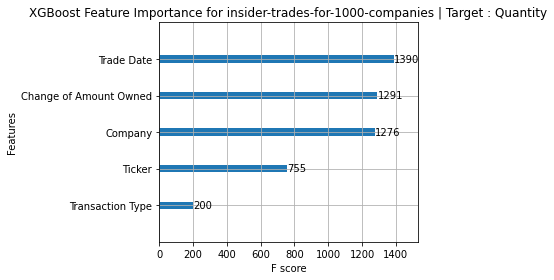

Target Variable: Price
CATS=====================
['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
CONTS=====================
['Filing Date', 'Insider Name', 'Title', 'Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close', 'Title_no_percent']
17
Could not convert Filing Date to float.
Could not convert Insider Name to float.
Could not convert Title to float.
Could not convert Title_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  Filing Date
Error with  Insider Name
Error with  Title
Error with  Title_no_percent
Continuous variables that made the cut : ['Quantity', 'Owned', 'Value', 'Date Filed Open', 'Date Filed Close', 'Date Traded Open', 'Date Traded Close']
Categorical variables that made the cut : ['Company', 'Trade Date', 'Ticker', 'Transaction Type', 'Change of Amount Owned', 'Change of Amount Owned_no_percent']
Tabula

  2%|▏         | 1/42 [00:00<00:09,  4.28it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.2564197845411801, 'Adjusted R-Squared': 0.25520179893027295, 'RMSE': 293.6372439090799, 'Time taken': 0.23340535163879395}


  5%|▍         | 2/42 [00:00<00:13,  2.89it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9222139451144116, 'Adjusted R-Squared': 0.9220865314290954, 'RMSE': 94.97255002253965, 'Time taken': 0.42374181747436523}
{'Model': 'BayesianRidge', 'R-Squared': 0.007845630398838455, 'Adjusted R-Squared': 0.006220479916281385, 'RMSE': 339.185166309487, 'Time taken': 0.034139394760131836}


 10%|▉         | 4/42 [00:00<00:07,  5.16it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9016384812243657, 'Adjusted R-Squared': 0.9014773648954949, 'RMSE': 106.79719325784546, 'Time taken': 0.1707448959350586}
{'Model': 'DummyRegressor', 'R-Squared': -3.0563523763849076e-05, 'Adjusted R-Squared': -0.0016686152248672759, 'RMSE': 340.5288, 'Time taken': 0.012676239013671875}
{'Model': 'ElasticNet', 'R-Squared': 0.014276402509684982, 'Adjusted R-Squared': 0.012661785642379075, 'RMSE': 338.0841438565573, 'Time taken': 0.019119739532470703}


 19%|█▉        | 8/42 [00:01<00:04,  6.96it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.010452019663797496, 'Adjusted R-Squared': 0.008831138451125708, 'RMSE': 338.73935365869323, 'Time taken': 0.30384016036987305}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8572536265295214, 'Adjusted R-Squared': 0.857019807735958, 'RMSE': 128.6559179992774, 'Time taken': 0.12439084053039551}


 21%|██▏       | 9/42 [00:03<00:20,  1.62it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8878861936354039, 'Adjusted R-Squared': 0.8877025510369361, 'RMSE': 114.01888111949731, 'Time taken': 2.1620805263519287}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:15<07:41, 14.89s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -113080.70255288857, 'Adjusted R-Squared': -113265.93056689821, 'RMSE': 114509.99493131277, 'Time taken': 72.38606858253479}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.012837049403097711, 'Adjusted R-Squared': 0.011220074873045549, 'RMSE': 338.33088896446316, 'Time taken': 0.04681062698364258}


 31%|███       | 13/42 [01:17<04:41,  9.69s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7772860971525346, 'Adjusted R-Squared': 0.7769212914148648, 'RMSE': 160.70185519977431, 'Time taken': 1.1932179927825928}


 33%|███▎      | 14/42 [01:17<03:38,  7.81s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8850138479827881, 'Adjusted R-Squared': 0.8848255004774365, 'RMSE': 115.47022085812287, 'Time taken': 0.5494129657745361}
{'Model': 'HuberRegressor', 'R-Squared': -0.03984876730243059, 'Adjusted R-Squared': -0.04155204128654577, 'RMSE': 347.2420542585731, 'Time taken': 0.08704566955566406}


 38%|███▊      | 16/42 [01:17<02:08,  4.95s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.3361459478211879, 'Adjusted R-Squared': 0.335058553796325, 'RMSE': 277.44925, 'Time taken': 0.14056038856506348}


 45%|████▌     | 19/42 [01:51<02:37,  6.86s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.2118801615985879, 'Adjusted R-Squared': -0.213865223288348, 'RMSE': 374.86687363464466, 'Time taken': 33.422800064086914}
{'Model': 'Lars', 'R-Squared': 0.004537189699000188, 'Adjusted R-Squared': 0.0029066199851575103, 'RMSE': 339.75021954048395, 'Time taken': 0.05409955978393555}
{'Model': 'LarsCV', 'R-Squared': 0.004537189699000188, 'Adjusted R-Squared': 0.0029066199851575103, 'RMSE': 339.75021954048395, 'Time taken': 0.08182144165039062}
{'Model': 'Lasso', 'R-Squared': 0.009082918642278837, 'Adjusted R-Squared': 0.007459794839891232, 'RMSE': 338.97360611644336, 'Time taken': 0.02550363540649414}


 55%|█████▍    | 23/42 [01:51<00:57,  3.04s/it]

{'Model': 'LassoCV', 'R-Squared': 0.007504565010510222, 'Adjusted R-Squared': 0.0058788558622884235, 'RMSE': 339.2434608570567, 'Time taken': 0.3001747131347656}
{'Model': 'LassoLars', 'R-Squared': -3.059225102508556e-05, 'Adjusted R-Squared': -0.001668643999183983, 'RMSE': 340.5288165452401, 'Time taken': 0.04382967948913574}
{'Model': 'LassoLarsCV', 'R-Squared': 0.004537189699000188, 'Adjusted R-Squared': 0.0029066199851575103, 'RMSE': 339.75021954048395, 'Time taken': 0.09847545623779297}
{'Model': 'LassoLarsIC', 'R-Squared': 0.004537189699000188, 'Adjusted R-Squared': 0.0029066199851575103, 'RMSE': 339.75021954048395, 'Time taken': 0.025565624237060547}


 62%|██████▏   | 26/42 [01:52<00:28,  1.80s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.004537189698987865, 'Adjusted R-Squared': 0.002906619985145187, 'RMSE': 339.75021954048606, 'Time taken': 0.03293728828430176}
{'Model': 'LinearSVR', 'R-Squared': -0.046919986683052084, 'Adjusted R-Squared': -0.04863484333609547, 'RMSE': 348.4207182075546, 'Time taken': 0.06976199150085449}


 64%|██████▍   | 27/42 [02:13<01:14,  4.98s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.02876830872150382, 'Adjusted R-Squared': 0.027177429620310667, 'RMSE': 335.5897199020728, 'Time taken': 21.068447589874268}


 71%|███████▏  | 30/42 [02:24<00:48,  4.06s/it]

{'Model': 'NuSVR', 'R-Squared': -0.03389995787676292, 'Adjusted R-Squared': -0.03559348770129489, 'RMSE': 346.2473713279596, 'Time taken': 11.62080430984497}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.005569179202791763, 'Adjusted R-Squared': 0.0039402998894467745, 'RMSE': 339.5740655069158, 'Time taken': 0.024739980697631836}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.007464934451945293, 'Adjusted R-Squared': 0.00583916038880361, 'RMSE': 339.25023382203085, 'Time taken': 0.0746464729309082}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.052072310579976966, 'Adjusted R-Squared': -0.05379560674800299, 'RMSE': 349.2770267761883, 'Time taken': 0.07307767868041992}


 76%|███████▌  | 32/42 [02:25<00:27,  2.72s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.0037298494967351603, 'Adjusted R-Squared': 0.002097957358318747, 'RMSE': 339.8879637214756, 'Time taken': 0.06958413124084473}
{'Model': 'RANSACRegressor', 'R-Squared': -0.10005771319575762, 'Adjusted R-Squared': -0.10185960953186846, 'RMSE': 357.1535419061588, 'Time taken': 0.1821448802947998}


 88%|████████▊ | 37/42 [02:30<00:07,  1.60s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9369817052071857, 'Adjusted R-Squared': 0.936878481137091, 'RMSE': 85.48315642009776, 'Time taken': 4.973093271255493}
{'Model': 'Ridge', 'R-Squared': 0.007429786747790268, 'Adjusted R-Squared': 0.0058039551126516375, 'RMSE': 339.2562405424514, 'Time taken': 0.016997337341308594}
{'Model': 'RidgeCV', 'R-Squared': 0.006617712709960921, 'Adjusted R-Squared': 0.004990550896218138, 'RMSE': 339.39499387897416, 'Time taken': 0.028775453567504883}
{'Model': 'SGDRegressor', 'R-Squared': 0.007242928085592015, 'Adjusted R-Squared': 0.0056167903756586535, 'RMSE': 339.28817278418916, 'Time taken': 0.07261347770690918}


 93%|█████████▎| 39/42 [02:41<00:08,  2.74s/it]

{'Model': 'SVR', 'R-Squared': -0.04747602077605806, 'Adjusted R-Squared': -0.04919178821385661, 'RMSE': 348.5132315245378, 'Time taken': 11.310403823852539}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.004537189698987865, 'Adjusted R-Squared': 0.002906619985145187, 'RMSE': 339.75021954048606, 'Time taken': 0.017229795455932617}
{'Model': 'TweedieRegressor', 'R-Squared': 0.012837049403097711, 'Adjusted R-Squared': 0.011220074873045549, 'RMSE': 338.33088896446316, 'Time taken': 0.05849909782409668}


 98%|█████████▊| 41/42 [02:42<00:02,  2.09s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9562642377511438, 'Adjusted R-Squared': 0.956192598500941, 'RMSE': 71.21403, 'Time taken': 0.8597888946533203}


100%|██████████| 42/42 [02:42<00:00,  3.88s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8977381847126817, 'Adjusted R-Squared': 0.8975706796917361, 'RMSE': 108.89400602207988, 'Time taken': 0.22549223899841309}
Project: insider-trades-for-1000-companies
insider-trades-for-1000-companies
Target: Price
Price
Target Standard Deviation: 359.6078186035156
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
XGBRegressor                                 0.96       0.96     71.21   
RandomForestRegressor                        0.94       0.94     85.48   
BaggingRegressor                             0.92       0.92     94.97   
DecisionTreeRegressor                        0.90       0.90    106.80   
LGBMRegressor                                0.90       0.90    108.89   
ExtraTreesRegressor                          0.89       0.89    114.02   
HistGradientBoostingRegressor                0.88       0.89    115.47   
ExtraTreeRegressor         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,142961.843750,117227.148438,342.384521,00:09
1,96735.554688,73687.203125,271.453857,00:09
2,82519.031250,1082359.500000,1040.365112,00:09


Better model found at epoch 0 with _rmse value: 342.384521484375.
Better model found at epoch 1 with _rmse value: 271.453857421875.
No improvement since epoch 1: early stopping


,Company,Trade Date,Ticker,Transaction Type,Change of Amount Owned,Change of Amount Owned_no_percent,Price,Price_pred
0,383.00,478.00,358.00,1.00,160.00,159.00,97.45,153.49
1,390.00,521.00,348.00,3.00,67.00,67.00,204.59,111.73
2,97.00,362.00,84.00,3.00,38.00,38.00,13.42,112.35
3,359.00,140.00,279.00,3.00,27.00,27.00,183.90,67.91
4,619.00,280.00,581.00,2.00,1.00,1.00,45.59,101.94
5,247.00,283.00,50.00,3.00,52.00,52.00,48.94,101.88
6,178.00,197.00,175.00,3.00,38.00,38.00,53.21,98.85
7,154.00,241.00,137.00,2.00,7.00,7.00,38.47,257.79
8,320.00,206.00,275.00,3.00,13.00,13.00,83.78,54.95


<Figure size 432x288 with 0 Axes>

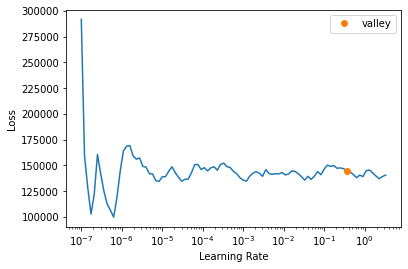

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   56.00      56.92
1  135.09     122.18
2   92.99     105.35
3  123.65     117.71
4   69.62      76.65
XGBoost RMSE:  71.205215


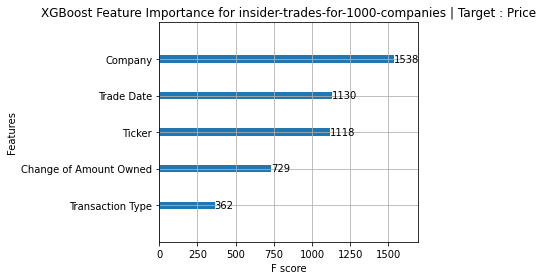

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

                  feature  importance
0        Transaction Type         200
1  Change of Amount Owned        1291
2                 Company        1276
3                  Ticker         755
4              Trade Date        1390


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

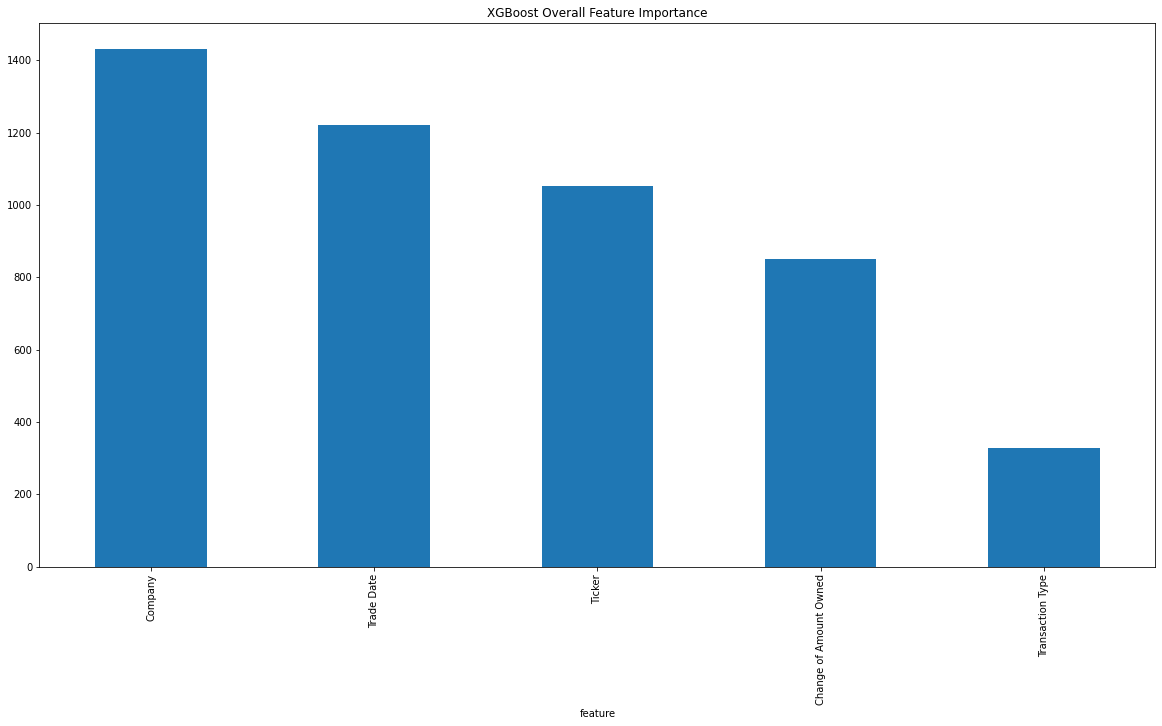

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

Company                              0
Filing Date                          0
Trade Date                           0
Ticker                               0
Insider Name                         0
Title                                0
Transaction Type                     0
Price                                0
Quantity                             0
Owned                                0
Change of Amount Owned               0
Value                                0
Date Filed Open                      0
Date Filed Close                     0
Date Traded Open                     0
Date Traded Close                    0
Title_no_percent                     0
Change of Amount Owned_no_percent    0
dtype: int64

# **To Be Continued...**